In [ ]:
import random

# Define suits and ranks
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
points = {
    'Ace': 5,
    'King': 4,
    'Queen': 3,
    'Jack': 2,
    '10': 1
}
# Create a deck of 52 cards
deck = [(rank, suit) for suit in suits for rank in ranks]

# Shuffle the deck
random.shuffle(deck)

# Deal 13 cards to the player
player_hand = deck[:13]
remaining_deck = deck[13:]
# Calculate points
total_points = sum(points.get(rank, 0) for rank, suit in player_hand)

print("Player's Hand:", player_hand)

print("Total Points:", total_points)

Player's Hand: [('10', 'Hearts'), ('King', 'Clubs'), ('Queen', 'Hearts'), ('Ace', 'Hearts'), ('2', 'Spades'), ('3', 'Spades'), ('10', 'Clubs'), ('2', 'Diamonds'), ('9', 'Clubs'), ('3', 'Diamonds'), ('Ace', 'Clubs'), ('7', 'Diamonds'), ('5', 'Clubs')]
Total Points: 19


In [ ]:
# Count occurrences of specific cards
count_aces = sum(1 for rank, suit in player_hand if rank == 'Ace')
count_kings = sum(1 for rank, suit in player_hand if rank == 'King')
count_queens = sum(1 for rank, suit in player_hand if rank == 'Queen')
count_jacks = sum(1 for rank, suit in player_hand if rank == 'Jack')
count_tens = sum(1 for rank, suit in player_hand if rank == '10')


print("Count of Aces:", count_aces)
print("Count of Kings:", count_kings)
print("Count of Queens:", count_queens)
print("Count of Jacks:", count_jacks)
print("Count of 10s:", count_tens)

Count of Aces: 2
Count of Kings: 1
Count of Queens: 1
Count of Jacks: 0
Count of 10s: 2


Strategy 1 (Optimistic) - Win the first 7 hands to win the match.
In this strategy, there is no dependence on the partner's hand.

In [ ]:
def optimistic_strategy_1(player_hand):
    suit_count = {suit: {'Ace': 0, 'King': 0, 'Queen': 0, 'Jack': 0} for suit in suits}

    for rank, suit in player_hand:
        if rank in suit_count[suit]:
            suit_count[suit][rank] += 1

    # Case 1: 4 Aces and 3 Kings
    if count_aces == 4 and count_kings == 3:
        return "1 NT call"

    # Case 2: 4 Aces, 2 Kings, 1 Queen (Queen must be in suit with Ace and King)
    if count_aces == 4 and count_kings == 2 and count_queens == 1:
        for suit, counts in suit_count.items():
            if counts['Ace'] > 0 and counts['King'] > 0 and counts['Queen'] > 0:
                return "1 NT call"

    # Case 3: 4 Aces, 1 King, 1 Queen, 1 Jack (King, Queen, and Jack in same suit)
    if count_aces == 4 and count_kings == 1 and count_queens == 1 and count_jacks == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0 and counts['Jack'] > 0:
                return "1 NT call"

    return "No call"

print("Optimistic Strategy 1 Result:", optimistic_strategy_1(player_hand))

Optimistic Strategy 1 Result: No call


Strategy 2 (Optimistic) - Win any 7 hands to win the match, In this strategy, there is no dependency on the partner's hand.

In [ ]:
def optimistic_strategy_2(player_hand):
    suit_count = {suit: {'Ace': 0, 'King': 0, 'Queen': 0, 'Jack': 0, '10': 0} for suit in suits}

    for rank, suit in player_hand:
        if rank in suit_count[suit]:
            suit_count[suit][rank] += 1

    # Case 1: 4 Aces and 4 Kings
    if count_aces == 4 and count_kings == 4:
        return "2 NT call"

    # Case 2: 4 Aces, 3 Kings, 1 Queen (Queen must be in suit with selected Kings)
    if count_aces == 4 and count_kings == 3 and count_queens == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0:
                return "2 NT call"

    # Case 3: 4 Aces, 2 Kings, 2 Queens (Queens must be in suit with selected Kings)
    if count_aces == 4 and count_kings == 2 and count_queens == 2:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0:
                return "2 NT call"

    # Case 4: 4 Aces, 2 Kings, 1 Queen, 1 Jack (Queen and Jack must be in suit with selected King)
    if count_aces == 4 and count_kings == 2 and count_queens == 1 and count_jacks == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0 and counts['Jack'] > 0:
                return "2 NT call"

    # Case 5: 4 Aces, 1 King, 1 Queen, 1 Jack, 1 Ten (All in the same suit)
    if count_aces == 4 and count_kings == 1 and count_queens == 1 and count_jacks == 1 and count_tens == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0 and counts['Jack'] > 0 and counts['10'] > 0:
                return "2 NT call"

    return "No call"

print("Optimistic Strategy 2 Result:", optimistic_strategy_2(player_hand))

Optimistic Strategy 2 Result: No call


In [ ]:
def optimistic_strategy_3(player_hand):
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    suit_count = {suit: {'Ace': 0, 'King': 0, 'Queen': 0, 'Jack': 0, '10': 0} for suit in suits}

    for rank, suit in player_hand:
        if rank in suit_count[suit]:
            suit_count[suit][rank] += 1

    # Count total number of Aces, Kings, Queens, Jacks, and Tens
    count_aces = sum(counts['Ace'] for counts in suit_count.values())
    count_kings = sum(counts['King'] for counts in suit_count.values())
    count_queens = sum(counts['Queen'] for counts in suit_count.values())
    count_jacks = sum(counts['Jack'] for counts in suit_count.values())
    count_tens = sum(counts['10'] for counts in suit_count.values())

    # Case 1: 4 Aces and 4 Kings
    if count_aces == 4 and count_kings == 4:
        return "3 NT call"

    # Case 2: 4 Aces, 3 Kings, 1 Queen (Queen must be in suit with selected Kings)
    if count_aces == 4 and count_kings == 3 and count_queens == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0:
                return "3 NT call"

    # Case 3: 4 Aces, 2 Kings, 2 Queens (Queens must be in suit with selected Kings)
    if count_aces == 4 and count_kings == 2 and count_queens == 2:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0:
                return "3 NT call"

    # Case 4: 4 Aces, 2 Kings, 1 Queen, 1 Jack (Queen and Jack must be in suit with selected King)
    if count_aces == 4 and count_kings == 2 and count_queens == 1 and count_jacks == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0 and counts['Jack'] > 0:
                return "3 NT call"

    # Case 5: 4 Aces, 1 King, 1 Queen, 1 Jack, 1 Ten (All in the same suit)
    if count_aces == 4 and count_kings == 1 and count_queens == 1 and count_jacks == 1 and count_tens == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0 and counts['Jack'] > 0 and counts['10'] > 0:
                return "3 NT call"

    return "No call"
print("Optimistic Strategy 3 Result:", optimistic_strategy_3(player_hand))


Optimistic Strategy 3 Result: No call


Optimistic Strategy (Depend on Partner's Hand)

In [ ]:
import random

def generate_deck():
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['Ace', 'King', 'Queen', 'Jack', '10', '9', '8', '7', '6', '5', '4', '3', '2']
    return [(rank, suit) for suit in suits for rank in ranks]

def deal_hand(deck, num_cards=13):
    return random.sample(deck, num_cards)

def optimistic_strategy_1(player_hand):
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    suit_count = {suit: {'Ace': 0, 'King': 0, 'Queen': 0, 'Jack': 0} for suit in suits}

    for rank, suit in player_hand:
        if rank in suit_count[suit]:
            suit_count[suit][rank] += 1

    count_aces = sum(counts['Ace'] for counts in suit_count.values())
    count_kings = sum(counts['King'] for counts in suit_count.values())
    count_queens = sum(counts['Queen'] for counts in suit_count.values())
    count_jacks = sum(counts['Jack'] for counts in suit_count.values())

    # Case 1: 4 Aces and 3 Kings
    if count_aces == 4 and count_kings == 3:
        return "1 NT call"

    # Case 2: 4 Aces, 2 Kings, 1 Queen (Queen must be in the same suit as a King)
    if count_aces == 4 and count_kings == 2 and count_queens == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0:
                return "1 NT call"

    # Case 3: 4 Aces, 1 King, 1 Queen, 1 Jack (King, Queen, and Jack in same suit)
    if count_aces == 4 and count_kings == 1 and count_queens == 1 and count_jacks == 1:
        for suit, counts in suit_count.items():
            if counts['King'] > 0 and counts['Queen'] > 0 and counts['Jack'] > 0:
                return "1 NT call"

    return "No call"

def expected_partner_combinations(player_hand):
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    suit_count = {suit: {'Ace': 0, 'King': 0, 'Queen': 0, 'Jack': 0} for suit in suits}

    for rank, suit in player_hand:
        if rank in suit_count[suit]:
            suit_count[suit][rank] += 1

    current_counts = {
        'Ace': sum(suit_count[suit]['Ace'] for suit in suits),
        'King': sum(suit_count[suit]['King'] for suit in suits),
        'Queen': sum(suit_count[suit]['Queen'] for suit in suits),
        'Jack': sum(suit_count[suit]['Jack'] for suit in suits),
    }

    # Possible combinations to complete 1NT
    required_combinations = [
        {'Aces': 4, 'Kings': 3, 'Queens': 0, 'Jacks': 0},  # 4 Aces, 3 Kings
        {'Aces': 4, 'Kings': 2, 'Queens': 1, 'Jacks': 0},  # 4 Aces, 2 Kings, 1 Queen
        {'Aces': 4, 'Kings': 1, 'Queens': 1, 'Jacks': 1},  # 4 Aces, 1 King, 1 Queen, 1 Jack
    ]

    print("\nTo complete 1NT, Player 1 expects these possible card combinations from partner:")

    combination_found = False
    for i, req in enumerate(required_combinations, start=1):
        needed = {
            'Ace': req['Aces'] - current_counts['Ace'],
            'King': req['Kings'] - current_counts['King'],
            'Queen': req['Queens'] - current_counts['Queen'],
            'Jack': req['Jacks'] - current_counts['Jack'],
        }

        # Ensure all values are non-negative (i.e., missing cards)
        if all(v >= 0 for v in needed.values()):
            combination_found = True
            print(f"\nCombination {i}:")

            if needed['Ace'] > 0:
                print(f"  {needed['Ace']} Ace(s) from Hearts, Diamonds, Clubs, Spades")
            if needed['King'] > 0:
                print(f"  {needed['King']} King(s) from available suits")
            if needed['Queen'] > 0:
                print(f"  {needed['Queen']} Queen(s) from a suit where 2 Kings exist")
            if needed['Jack'] > 0:
                print(f"  {needed['Jack']} Jack(s) from the same suit as the King and Queen")

    if not combination_found:
        print("  No valid combinations found.")

def evaluate_hand():
    deck = generate_deck()
    player1_hand = deal_hand(deck)

    player1_call = optimistic_strategy_1(player1_hand)

    print("\nPlayer 1 Hand:", player1_hand)
    print("Player 1 Call:", player1_call)

    if player1_call == "No call":
        expected_partner_combinations(player1_hand)

# Example usage
evaluate_hand()



Player 1 Hand: [('9', 'Clubs'), ('5', 'Spades'), ('9', 'Spades'), ('2', 'Clubs'), ('2', 'Diamonds'), ('4', 'Diamonds'), ('Ace', 'Spades'), ('8', 'Spades'), ('9', 'Hearts'), ('King', 'Diamonds'), ('9', 'Diamonds'), ('7', 'Clubs'), ('7', 'Diamonds')]
Player 1 Call: No call

To complete 1NT, Player 1 expects these possible card combinations from partner:

Combination 1:
  3 Ace(s) from Hearts, Diamonds, Clubs, Spades
  2 King(s) from available suits

Combination 2:
  3 Ace(s) from Hearts, Diamonds, Clubs, Spades
  1 King(s) from available suits
  1 Queen(s) from a suit where 2 Kings exist

Combination 3:
  3 Ace(s) from Hearts, Diamonds, Clubs, Spades
  1 Queen(s) from a suit where 2 Kings exist
  1 Jack(s) from the same suit as the King and Queen


4 cards Auction Bridge

In [ ]:
import random

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Create a deck of cards
deck = [(rank, suit) for suit in SUITS for rank in RANKS]
random.shuffle(deck)

# Distribute cards to 4 players
players = {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

# Print initial hands of each player
for i in range(4):
    print(f"Player {i} cards: {players[i]}")

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Play 13 rounds
tricks_won = [0] * 4
lead_player = 0  # Start with player 0

for round_num in range(13):
    print(f"Round {round_num + 1}: Player {lead_player} starts the trick")
    trick = []
    lead_suit = None

    for i in range(4):
        player = (lead_player + i) % 4
        if i == 0:
            played_card = max(players[player], key=lambda card: RANKS.index(card[0]))  # Lead with the highest card
            lead_suit = played_card[1]
        else:
            playable_cards = [card for card in players[player] if card[1] == lead_suit]
            if playable_cards:
                played_card = max(playable_cards, key=lambda card: RANKS.index(card[0]))  # Play highest in lead suit
            else:
                played_card = min(players[player], key=lambda card: RANKS.index(card[0]))  # Play lowest card of any suit

        players[player].remove(played_card)
        trick.append(played_card)

    # Determine the winner of the trick
    winner = get_trick_winner(trick, lead_suit)
    lead_player = (lead_player + winner) % 4
    tricks_won[lead_player] += 1

    print(f"Trick {round_num + 1}: {trick}, Winner: Player {lead_player}")

# Calculate team scores
team_A_score = tricks_won[0] + tricks_won[2]
team_B_score = tricks_won[1] + tricks_won[3]

# Print results
for i, wins in enumerate(tricks_won):
    print(f"Player {i} won {wins} tricks.")

print(f"Team A (Players 0 & 2) Total Tricks: {team_A_score}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_score}")


Player 0 cards: [('2', 'Spades'), ('3', 'Spades'), ('7', 'Spades'), ('10', 'Spades'), ('K', 'Spades'), ('2', 'Hearts'), ('3', 'Diamonds'), ('8', 'Diamonds'), ('Q', 'Diamonds'), ('4', 'Clubs'), ('7', 'Clubs'), ('8', 'Clubs'), ('Q', 'Clubs')]
Player 1 cards: [('4', 'Spades'), ('8', 'Spades'), ('4', 'Hearts'), ('5', 'Hearts'), ('8', 'Hearts'), ('9', 'Hearts'), ('K', 'Hearts'), ('A', 'Hearts'), ('9', 'Diamonds'), ('10', 'Diamonds'), ('5', 'Clubs'), ('J', 'Clubs'), ('K', 'Clubs')]
Player 2 cards: [('6', 'Spades'), ('9', 'Spades'), ('A', 'Spades'), ('6', 'Hearts'), ('10', 'Hearts'), ('4', 'Diamonds'), ('6', 'Diamonds'), ('7', 'Diamonds'), ('J', 'Diamonds'), ('K', 'Diamonds'), ('2', 'Clubs'), ('3', 'Clubs'), ('A', 'Clubs')]
Player 3 cards: [('5', 'Spades'), ('J', 'Spades'), ('Q', 'Spades'), ('3', 'Hearts'), ('7', 'Hearts'), ('J', 'Hearts'), ('Q', 'Hearts'), ('2', 'Diamonds'), ('5', 'Diamonds'), ('A', 'Diamonds'), ('6', 'Clubs'), ('9', 'Clubs'), ('10', 'Clubs')]
Round 1: Player 0 starts the tr

In [ ]:
import random
from itertools import combinations
from collections import Counter
import copy

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Create a deck of cards
deck = [(rank, suit) for suit in SUITS for rank in RANKS]
random.shuffle(deck)

# Distribute fixed hands for players 1 and 3
fixed_players = {
    1: sorted(deck[:13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))),
    3: sorted(deck[13:26], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0])))
}

remaining_cards = deck[26:]
possible_distributions = list(combinations(remaining_cards, 13))

def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    if not valid_cards:
        return 0  # Default to first player if something goes wrong
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

def play_game(player2_hand, player4_hand):
    players = {
        1: copy.deepcopy(fixed_players[1]),
        3: copy.deepcopy(fixed_players[3]),
        2: sorted(player2_hand, key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))),
        4: sorted(player4_hand, key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0])))
    }

    tricks_won = {1: 0, 2: 0, 3: 0, 4: 0}
    lead_player = 1  # Start with player 1

    for _ in range(13):
        trick = []
        lead_suit = None
        played_cards = {}

        for i in range(4):
            player = (lead_player + i - 1) % 4 + 1
            if not players[player]:
                continue
            if i == 0:
                played_card = max(players[player], key=lambda card: RANKS.index(card[0]))
                lead_suit = played_card[1]
            else:
                playable_cards = [card for card in players[player] if card[1] == lead_suit]
                if playable_cards:
                    played_card = max(playable_cards, key=lambda card: RANKS.index(card[0]))
                else:
                    played_card = min(players[player], key=lambda card: (RANKS.index(card[0]), SUITS.index(card[1])))
            players[player].remove(played_card)
            trick.append(played_card)
            played_cards[player] = played_card

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner - 1) % 4 + 1
        tricks_won[lead_player] += 1

    team_A_score = tricks_won[1] + tricks_won[3]
    return team_A_score

def calculate_trick_distribution():
    result_counts = Counter()
    for distribution in possible_distributions:
        player2_hand = distribution[:13]
        player4_hand = distribution[13:]
        team_A_tricks = play_game(player2_hand, player4_hand)
        result_counts[team_A_tricks] += 1

    for tricks in range(14):
        print(f"Team A winning {tricks} tricks: {result_counts[tricks]}")
    print(f"Total cases: {sum(result_counts.values())}")

calculate_trick_distribution()


Team A winning 0 tricks: 0
Team A winning 1 tricks: 0
Team A winning 2 tricks: 24998
Team A winning 3 tricks: 0
Team A winning 4 tricks: 0
Team A winning 5 tricks: 0
Team A winning 6 tricks: 55
Team A winning 7 tricks: 1043
Team A winning 8 tricks: 13203
Team A winning 9 tricks: 659996
Team A winning 10 tricks: 1242353
Team A winning 11 tricks: 2557708
Team A winning 12 tricks: 4547866
Team A winning 13 tricks: 1353378
Total cases: 10400600


Optimistic Strategy


In [ ]:
import itertools
import random

RANKS = "A K Q J 10 9 8 7 6 5 4 3 2".split()
SUITS = "Spades Hearts Diamonds Clubs".split()

def generate_deck():
    return list(itertools.product(RANKS, SUITS))

def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    hands = [deck[i::4] for i in range(4)]
    return hands

def evaluate_hand(hand):
    rank_counts = {rank: sum(1 for card in hand if card[0] == rank) for rank in RANKS}

    if rank_counts.get("A", 0) == 4:
        if rank_counts.get("K", 0) >= 3:
            return 1  # Strategy for 1 No Trump
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 1:
            return 1
        elif rank_counts.get("K", 0) >= 1 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1:
            return 1

        if rank_counts.get("K", 0) >= 4:
            return 2  # Strategy for 2 No Trump
        elif rank_counts.get("K", 0) >= 3 and rank_counts.get("Q", 0) >= 1:
            return 2
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 2:
            return 2
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1:
            return 2
        elif rank_counts.get("K", 0) >= 1 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1 and rank_counts.get("10", 0) >= 1:
            return 2

        if rank_counts.get("K", 0) >= 4 and rank_counts.get("Q", 0) >= 1:
            return 3  # Strategy for 3 No Trump
        elif rank_counts.get("K", 0) >= 3 and rank_counts.get("Q", 0) >= 2:
            return 3
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 2 and rank_counts.get("J", 0) >= 1:
            return 3
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1 and rank_counts.get("10", 0) >= 1:
            return 3
        elif rank_counts.get("K", 0) >= 1 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1 and rank_counts.get("10", 0) >= 1 and rank_counts.get("9", 0) >= 1:
            return 3

    return 0  # Default to 0 No Trump

def conduct_bidding(hands):
    bids = [evaluate_hand(hands[i]) for i in range(4)]
    highest_bid = max(bids)
    declarer = bids.index(highest_bid) if highest_bid > 0 else None

    print("Player Hands:")
    for i, hand in enumerate(hands):
        print(f"Player {i}: {hand}")

    print("\nBidding Results:")
    for i, bid in enumerate(bids):
        print(f"Player {i}: {bid} No Trump")

    if declarer is not None:
        print(f"Final Contract: {highest_bid} No Trump by Player {declarer}")
    else:
        print("No one bid. Playing 0 No Trump.")

    return highest_bid, declarer

# Running the bidding process
hands = deal_cards()
conduct_bidding(hands)


Player Hands:
Player 0: [('2', 'Clubs'), ('A', 'Diamonds'), ('5', 'Diamonds'), ('6', 'Hearts'), ('2', 'Hearts'), ('J', 'Diamonds'), ('9', 'Hearts'), ('J', 'Spades'), ('4', 'Spades'), ('K', 'Hearts'), ('K', 'Spades'), ('3', 'Clubs'), ('3', 'Spades')]
Player 1: [('8', 'Diamonds'), ('A', 'Spades'), ('4', 'Diamonds'), ('7', 'Spades'), ('6', 'Clubs'), ('K', 'Clubs'), ('9', 'Clubs'), ('3', 'Diamonds'), ('7', 'Clubs'), ('10', 'Clubs'), ('9', 'Diamonds'), ('8', 'Clubs'), ('6', 'Diamonds')]
Player 2: [('J', 'Hearts'), ('10', 'Spades'), ('K', 'Diamonds'), ('A', 'Hearts'), ('7', 'Diamonds'), ('2', 'Spades'), ('6', 'Spades'), ('8', 'Hearts'), ('4', 'Clubs'), ('4', 'Hearts'), ('A', 'Clubs'), ('9', 'Spades'), ('7', 'Hearts')]
Player 3: [('10', 'Hearts'), ('Q', 'Hearts'), ('5', 'Spades'), ('J', 'Clubs'), ('Q', 'Diamonds'), ('Q', 'Clubs'), ('10', 'Diamonds'), ('Q', 'Spades'), ('8', 'Spades'), ('2', 'Diamonds'), ('5', 'Clubs'), ('3', 'Hearts'), ('5', 'Hearts')]

Bidding Results:
Player 0: 0 No Trump
Pl

(0, None)

New Strategy - Most Likely

In [ ]:
import itertools
import random

RANKS = "A K Q J 10 9 8 7 6 5 4 3 2".split()
SUITS = "Spades Hearts Diamonds Clubs".split()
POINTS = {"A": 5, "K": 4, "Q": 3, "J": 2, "10": 1}

def generate_deck():
    return list(itertools.product(RANKS, SUITS))

def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    hands = [deck[i::4] for i in range(4)]
    return hands

def calculate_points(hand):
    return sum(POINTS.get(card[0], 0) for card in hand)

def evaluate_hand(points):
    if points >= 30:
        return 3  # 3 No Trump
    elif points >= 25:
        return 2  # 2 No Trump
    elif points >= 20:
        return 1  # 1 No Trump
    else:
        return 0  # No Trump

def conduct_bidding(hands):
    points = [calculate_points(hands[i]) for i in range(4)]
    bids = [evaluate_hand(points[i]) for i in range(4)]
    highest_bid = max(bids)
    declarer = bids.index(highest_bid) if highest_bid > 0 else None

    print("Player Hands:")
    for i, hand in enumerate(hands):
        print(f"Player {i}: {hand}")

    print("\nPoints:")
    for i, pts in enumerate(points):
        print(f"Player {i}: {pts} points")

    print("\nBidding Results:")
    for i, bid in enumerate(bids):
        print(f"Player {i}: {bid} No Trump")

    if declarer is not None:
        print(f"Final Contract: {highest_bid} No Trump by Player {declarer}")
    else:
        print("No one bid. Playing 0 No Trump.")

    return highest_bid, declarer

# Running the bidding process
hands = deal_cards()
conduct_bidding(hands)

Player Hands:
Player 0: [('7', 'Spades'), ('J', 'Hearts'), ('2', 'Spades'), ('7', 'Diamonds'), ('Q', 'Clubs'), ('3', 'Hearts'), ('J', 'Diamonds'), ('5', 'Spades'), ('K', 'Clubs'), ('9', 'Clubs'), ('A', 'Clubs'), ('9', 'Hearts'), ('5', 'Clubs')]
Player 1: [('Q', 'Hearts'), ('8', 'Clubs'), ('A', 'Hearts'), ('J', 'Clubs'), ('6', 'Hearts'), ('6', 'Spades'), ('6', 'Clubs'), ('3', 'Spades'), ('4', 'Hearts'), ('10', 'Clubs'), ('4', 'Spades'), ('4', 'Clubs'), ('4', 'Diamonds')]
Player 2: [('3', 'Diamonds'), ('2', 'Hearts'), ('Q', 'Spades'), ('2', 'Diamonds'), ('10', 'Hearts'), ('8', 'Hearts'), ('8', 'Spades'), ('9', 'Spades'), ('K', 'Diamonds'), ('K', 'Hearts'), ('5', 'Hearts'), ('7', 'Hearts'), ('K', 'Spades')]
Player 3: [('10', 'Spades'), ('10', 'Diamonds'), ('Q', 'Diamonds'), ('6', 'Diamonds'), ('2', 'Clubs'), ('3', 'Clubs'), ('7', 'Clubs'), ('8', 'Diamonds'), ('9', 'Diamonds'), ('5', 'Diamonds'), ('J', 'Spades'), ('A', 'Diamonds'), ('A', 'Spades')]

Points:
Player 0: 16 points
Player 1: 11

(0, None)

Simulation (Most Likely)

In [ ]:
import itertools
import random
from collections import Counter

# Define card ranks and their respective points
RANKS = "A K Q J 10 9 8 7 6 5 4 3 2".split()
SUITS = "Spades Hearts Diamonds Clubs".split()
POINTS = {"A": 5, "K": 4, "Q": 3, "J": 2, "10": 1}

# Function to generate a deck
def generate_deck():
    return list(itertools.product(RANKS, SUITS))

# Function to deal hands to players
def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    return [deck[i::4] for i in range(4)]

# Function to evaluate hand points
def evaluate_points(hand):
    return sum(POINTS.get(card[0], 0) for card in hand)

# Function to determine the bid
def determine_bid(points):
    if points >= 30:
        return 3  # 3 No Trump
    elif points >= 25:
        return 2  # 2 No Trump
    elif points >= 20:
        return 1  # 1 No Trump
    return 0  # 0 No Trump

# Function to conduct the bidding simulation
def conduct_simulation(num_simulations=10000):
    bid_frequencies = {player: Counter() for player in range(4)}

    for _ in range(num_simulations):
        hands = deal_cards()
        player_points = [evaluate_points(hand) for hand in hands]
        player_bids = [determine_bid(points) for points in player_points]

        for player, bid in enumerate(player_bids):
            bid_frequencies[player][bid] += 1

    # Print results
    print("Simulation Results (10,000 runs):")
    for player in range(4):
        print(f"\nPlayer {player} bid frequencies:")
        for bid in range(4):
            print(f"  {bid} NT: {bid_frequencies[player][bid]}")

# Run the simulation
conduct_simulation()


Simulation Results (10,000 runs):

Player 0 bid frequencies:
  0 NT: 7984
  1 NT: 1533
  2 NT: 425
  3 NT: 58

Player 1 bid frequencies:
  0 NT: 7951
  1 NT: 1581
  2 NT: 418
  3 NT: 50

Player 2 bid frequencies:
  0 NT: 7970
  1 NT: 1592
  2 NT: 381
  3 NT: 57

Player 3 bid frequencies:
  0 NT: 8045
  1 NT: 1512
  2 NT: 398
  3 NT: 45


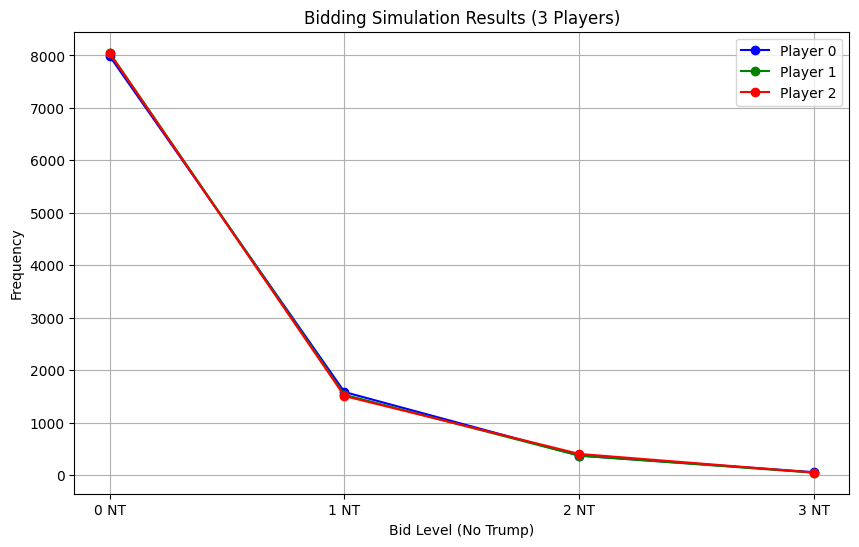

In [ ]:
import itertools
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Define card ranks and their respective points
RANKS = "A K Q J 10 9 8 7 6 5 4 3 2".split()
SUITS = "Spades Hearts Diamonds Clubs".split()
POINTS = {"A": 5, "K": 4, "Q": 3, "J": 2, "10": 1}

# Function to generate a deck
def generate_deck():
    return list(itertools.product(RANKS, SUITS))

# Function to deal hands to players
def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    return [deck[i::4] for i in range(4)]

# Function to evaluate hand points
def evaluate_points(hand):
    return sum(POINTS.get(card[0], 0) for card in hand)

# Function to determine the bid
def determine_bid(points):
    if points >= 30:
        return 3  # 3 No Trump
    elif points >= 25:
        return 2  # 2 No Trump
    elif points >= 20:
        return 1  # 1 No Trump
    return 0  # 0 No Trump

# Function to conduct the bidding simulation
def conduct_simulation(num_simulations=1000):
    bid_frequencies = {player: Counter() for player in range(4)}

    for _ in range(num_simulations):
        hands = deal_cards()
        player_points = [evaluate_points(hand) for hand in hands]
        player_bids = [determine_bid(points) for points in player_points]

        for player, bid in enumerate(player_bids):
            bid_frequencies[player][bid] += 1

    return bid_frequencies

# Function to visualize bid frequencies with line charts
def visualize_bids(bid_frequencies):
    players = list(bid_frequencies.keys())
    bids = range(4)
    colors = ['blue', 'green', 'red', 'purple']

    plt.figure(figsize=(10, 6))

    for i, player in enumerate(players[:3]):  # Only drawing 3 lines
        bid_counts = [bid_frequencies[player][bid] for bid in bids]
        plt.plot(bids, bid_counts, marker='o', linestyle='-', label=f'Player {player}', color=colors[i])

    plt.xlabel("Bid Level (No Trump)")
    plt.ylabel("Frequency")
    plt.title("Bidding Simulation Results (3 Players)")
    plt.xticks(bids, [f"{bid} NT" for bid in bids])
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the simulation and visualize results
bid_frequencies = conduct_simulation(10000)
visualize_bids(bid_frequencies)

Simulation - optimistic


In [ ]:
import itertools
import random

RANKS = "A K Q J 10 9 8 7 6 5 4 3 2".split()
SUITS = "Spades Hearts Diamonds Clubs".split()

def generate_deck():
    return list(itertools.product(RANKS, SUITS))

def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    hands = [deck[i::4] for i in range(4)]
    return hands

def evaluate_hand(hand):
    rank_counts = {rank: sum(1 for card in hand if card[0] == rank) for rank in RANKS}

    if rank_counts.get("A", 0) == 4:
        if rank_counts.get("K", 0) >= 3:
            return 1  # Strategy for 1 No Trump
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 1:
            return 1
        elif rank_counts.get("K", 0) >= 1 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1:
            return 1

        if rank_counts.get("K", 0) >= 4:
            return 2  # Strategy for 2 No Trump
        elif rank_counts.get("K", 0) >= 3 and rank_counts.get("Q", 0) >= 1:
            return 2
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 2:
            return 2
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1:
            return 2
        elif rank_counts.get("K", 0) >= 1 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1 and rank_counts.get("10", 0) >= 1:
            return 2

        if rank_counts.get("K", 0) >= 4 and rank_counts.get("Q", 0) >= 1:
            return 3  # Strategy for 3 No Trump
        elif rank_counts.get("K", 0) >= 3 and rank_counts.get("Q", 0) >= 2:
            return 3
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 2 and rank_counts.get("J", 0) >= 1:
            return 3
        elif rank_counts.get("K", 0) >= 2 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1 and rank_counts.get("10", 0) >= 1:
            return 3
        elif rank_counts.get("K", 0) >= 1 and rank_counts.get("Q", 0) >= 1 and rank_counts.get("J", 0) >= 1 and rank_counts.get("10", 0) >= 1 and rank_counts.get("9", 0) >= 1:
            return 3

    return 0  # Default to 0 No Trump

def simulate_bidding(n_simulations=10000):
    bid_counts = [{0: 0, 1: 0, 2: 0, 3: 0} for _ in range(4)]

    for _ in range(n_simulations):
        hands = deal_cards()
        bids = [evaluate_hand(hands[i]) for i in range(4)]

        for i in range(4):
            bid_counts[i][bids[i]] += 1

    for i in range(4):
        print(f"Player {i} Bidding Frequencies:")
        for bid, count in bid_counts[i].items():
            print(f"  {bid} No Trump: {count} times")
        print()

# Run the simulation
simulate_bidding()

Player 0 Bidding Frequencies:
  0 No Trump: 9997 times
  1 No Trump: 3 times
  2 No Trump: 0 times
  3 No Trump: 0 times

Player 1 Bidding Frequencies:
  0 No Trump: 9995 times
  1 No Trump: 5 times
  2 No Trump: 0 times
  3 No Trump: 0 times

Player 2 Bidding Frequencies:
  0 No Trump: 9996 times
  1 No Trump: 4 times
  2 No Trump: 0 times
  3 No Trump: 0 times

Player 3 Bidding Frequencies:
  0 No Trump: 9996 times
  1 No Trump: 4 times
  2 No Trump: 0 times
  3 No Trump: 0 times



In [ ]:
import random

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Create a deck of cards
deck = [(rank, suit) for suit in SUITS for rank in RANKS]
random.shuffle(deck)

# Distribute cards to 4 players
players = {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

# Show each player's hand
for i in range(4):
    print(f"Player {i} initial hand: {players[i]}")

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Play 13 rounds
tricks_won = [0] * 4
lead_player = 0  # Start with player 0

for round_num in range(13):
    print(f"Round {round_num + 1}: Player {lead_player} starts the trick")
    trick = []
    lead_suit = None

    for i in range(4):
        player = (lead_player + i) % 4
        if i == 0:
            played_card = max(players[player], key=lambda card: RANKS.index(card[0]))  # Lead with the highest card
            lead_suit = played_card[1]
        else:
            playable_cards = [card for card in players[player] if card[1] == lead_suit]

            if playable_cards:
                king_card = next((card for card in playable_cards if card[0] == "K"), None)
                queen_card = next((card for card in playable_cards if card[0] == "Q"), None)
                other_cards = [card for card in playable_cards if card[0] not in ["K", "Q"]]

                if king_card and other_cards:
                    if i in [1, 2, 3]:
                        played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                    else:  # If 4th player
                        if any(card[0] == "A" for card in trick):
                            played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                        else:
                            played_card = king_card
                elif king_card:
                    if i in [1, 2, 3]:
                        played_card = min(playable_cards, key=lambda card: RANKS.index(card[0]))
                    else:
                        if any(card[0] == "A" for card in trick):
                            played_card = min(playable_cards, key=lambda card: RANKS.index(card[0]))
                        else:
                            played_card = king_card
                elif queen_card and len(other_cards) >= 2:
                    if i in [1, 2, 3]:
                        played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                    else:  # If 4th player
                        if any(card[0] in ["A", "K"] for card in trick):
                            played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                        else:
                            played_card = queen_card
                else:
                    played_card = max(playable_cards, key=lambda card: RANKS.index(card[0]))
            else:
                played_card = min(players[player], key=lambda card: RANKS.index(card[0]))

        players[player].remove(played_card)
        trick.append(played_card)

    # Determine the winner of the trick
    winner = get_trick_winner(trick, lead_suit)
    lead_player = (lead_player + winner) % 4
    tricks_won[lead_player] += 1

    print(f"Trick {round_num + 1}: {trick}, Winner: Player {lead_player}")

# Calculate team scores
team_A_score = tricks_won[0] + tricks_won[2]
team_B_score = tricks_won[1] + tricks_won[3]

# Print results
for i, wins in enumerate(tricks_won):
    print(f"Player {i} won {wins} tricks.")

print(f"Team A (Players 0 & 2) Total Tricks: {team_A_score}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_score}")


Player 0 initial hand: [('4', 'Spades'), ('7', 'Spades'), ('2', 'Hearts'), ('3', 'Hearts'), ('5', 'Hearts'), ('6', 'Hearts'), ('7', 'Hearts'), ('A', 'Hearts'), ('4', 'Diamonds'), ('A', 'Diamonds'), ('2', 'Clubs'), ('4', 'Clubs'), ('10', 'Clubs')]
Player 1 initial hand: [('2', 'Spades'), ('6', 'Spades'), ('8', 'Spades'), ('4', 'Hearts'), ('8', 'Hearts'), ('J', 'Hearts'), ('2', 'Diamonds'), ('8', 'Diamonds'), ('J', 'Diamonds'), ('K', 'Diamonds'), ('5', 'Clubs'), ('6', 'Clubs'), ('A', 'Clubs')]
Player 2 initial hand: [('3', 'Spades'), ('5', 'Spades'), ('9', 'Spades'), ('K', 'Spades'), ('A', 'Spades'), ('6', 'Diamonds'), ('9', 'Diamonds'), ('10', 'Diamonds'), ('8', 'Clubs'), ('9', 'Clubs'), ('J', 'Clubs'), ('Q', 'Clubs'), ('K', 'Clubs')]
Player 3 initial hand: [('10', 'Spades'), ('J', 'Spades'), ('Q', 'Spades'), ('9', 'Hearts'), ('10', 'Hearts'), ('Q', 'Hearts'), ('K', 'Hearts'), ('3', 'Diamonds'), ('5', 'Diamonds'), ('7', 'Diamonds'), ('Q', 'Diamonds'), ('3', 'Clubs'), ('7', 'Clubs')]
Rou

Basic Strategy

In [ ]:
import random

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

def play_game():
    # Create a deck of cards
    deck = [(rank, suit) for suit in SUITS for rank in RANKS]
    random.shuffle(deck)

    # Distribute cards to 4 players
    players = {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

    # Function to determine the winner of a trick
    def get_trick_winner(trick, lead_suit):
        valid_cards = [card for card in trick if card[1] == lead_suit]
        winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
        return trick.index(winning_card)

    # Play 13 rounds
    tricks_won = [0] * 4
    lead_player = 0  # Start with player 0

    for _ in range(13):
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = max(players[player], key=lambda card: RANKS.index(card[0]))  # Lead with the highest card
                lead_suit = played_card[1]
            else:
                playable_cards = [card for card in players[player] if card[1] == lead_suit]

                if playable_cards:
                    king_card = next((card for card in playable_cards if card[0] == "K"), None)
                    queen_card = next((card for card in playable_cards if card[0] == "Q"), None)
                    other_cards = [card for card in playable_cards if card[0] not in ["K", "Q"]]

                    if king_card and other_cards:
                        if i in [1, 2, 3]:
                            played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                        else:  # If 4th player
                            if any(card[0] == "A" for card in trick):
                                played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                            else:
                                played_card = king_card
                    elif king_card:
                        if i in [1, 2, 3]:
                            played_card = min(playable_cards, key=lambda card: RANKS.index(card[0]))
                        else:
                            if any(card[0] == "A" for card in trick):
                                played_card = min(playable_cards, key=lambda card: RANKS.index(card[0]))
                            else:
                                played_card = king_card
                    elif queen_card and len(other_cards) >= 2:
                        if i in [1, 2, 3]:
                            played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                        else:  # If 4th player
                            if any(card[0] in ["A", "K"] for card in trick):
                                played_card = min(other_cards, key=lambda card: RANKS.index(card[0]))
                            else:
                                played_card = queen_card
                    else:
                        played_card = max(playable_cards, key=lambda card: RANKS.index(card[0]))
                else:
                    played_card = min(players[player], key=lambda card: RANKS.index(card[0]))

            players[player].remove(played_card)
            trick.append(played_card)

        # Determine the winner of the trick
        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    # Calculate team scores
    team_A_score = tricks_won[0] + tricks_won[2]
    team_B_score = tricks_won[1] + tricks_won[3]
    return abs(team_A_score - team_B_score)

# Run 1000 simulations
difference_counts = {}
for _ in range(10000):
    diff = play_game()
    difference_counts[diff] = difference_counts.get(diff, 0) + 1

# Print results
for diff, count in sorted(difference_counts.items()):
    print(f"Difference {diff}: {count} times")


Difference 1: 3190 times
Difference 3: 2750 times
Difference 5: 2023 times
Difference 7: 1171 times
Difference 9: 584 times
Difference 11: 221 times
Difference 13: 61 times


Real Game Data Visualization

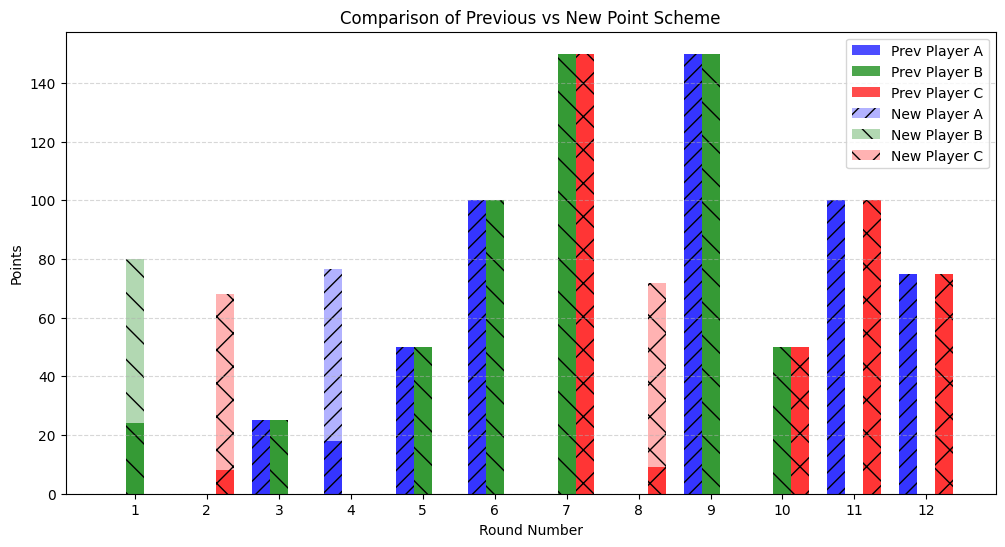

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Labels (Round Numbers)
rounds = np.arange(1, 13)

# Previous Point Scheme (Manually Inputted from Table)
prev_A = [0, 0, 25, 18, 50, 100, 0, 0, 150, 0, 100, 75]
prev_B = [24, 0, 25, 0, 50, 100, 150, 0, 150, 50, 0, 0]
prev_C = [0, 8, 0, 0, 0, 0, 150, 9, 0, 50, 100, 75]

# New Point Scheme
new_A = [0, 0, 25, 76.5, 50, 100, 0, 0, 150, 0, 100, 75]
new_B = [80, 0, 25, 0, 50, 100, 150, 0, 150, 50, 0, 0]
new_C = [0, 68, 0, 0, 0, 0, 150, 72, 0, 50, 100, 75]

# Bar Width
width = 0.25

# Setting up the figure and subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for Previous Point Scheme
ax.bar(rounds - width, prev_A, width, label="Prev Player A", color='blue', alpha=0.7)
ax.bar(rounds, prev_B, width, label="Prev Player B", color='green', alpha=0.7)
ax.bar(rounds + width, prev_C, width, label="Prev Player C", color='red', alpha=0.7)

# Plot bars for New Point Scheme
ax.bar(rounds - width, new_A, width, label="New Player A", color='blue', alpha=0.3, hatch="//")
ax.bar(rounds, new_B, width, label="New Player B", color='green', alpha=0.3, hatch="\\")
ax.bar(rounds + width, new_C, width, label="New Player C", color='red', alpha=0.3, hatch="x")

# Labels and title
ax.set_xlabel("Round Number")
ax.set_ylabel("Points")
ax.set_title("Comparison of Previous vs New Point Scheme")
ax.set_xticks(rounds)
ax.legend()
ax.grid(axis='y', linestyle="--", alpha=0.5)

# Show the graph
plt.show()


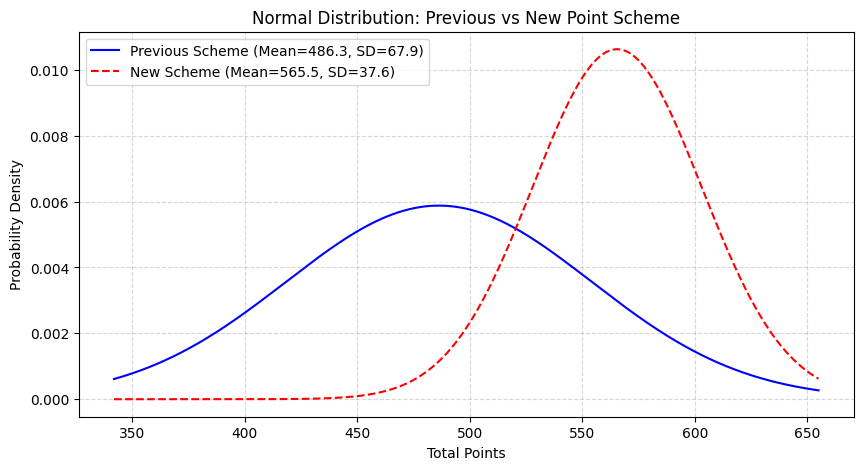

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given total points from table
prev_scores = [518, 549, 392]  # Player A, B, C (Previous)
new_scores = [576.5, 605, 515]  # Player A, B, C (New)

# Compute mean and standard deviation for both schemes
prev_mean, prev_std = np.mean(prev_scores), np.std(prev_scores)
new_mean, new_std = np.mean(new_scores), np.std(new_scores)

# Generate x-axis values (Score Range)
x = np.linspace(min(prev_scores + new_scores) - 50, max(prev_scores + new_scores) + 50, 1000)

# Compute Normal Distributions
prev_curve = stats.norm.pdf(x, prev_mean, prev_std)
new_curve = stats.norm.pdf(x, new_mean, new_std)

# Plot the curves
plt.figure(figsize=(10, 5))
plt.plot(x, prev_curve, label=f'Previous Scheme (Mean={prev_mean:.1f}, SD={prev_std:.1f})', color='blue')
plt.plot(x, new_curve, label=f'New Scheme (Mean={new_mean:.1f}, SD={new_std:.1f})', color='red', linestyle="dashed")

# Labels & Title
plt.xlabel("Total Points")
plt.ylabel("Probability Density")
plt.title("Normal Distribution: Previous vs New Point Scheme")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the graph
plt.show()


In [ ]:
import random
import copy  # Import copy module

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Create a deck of cards
deck = [(rank, suit) for suit in SUITS for rank in RANKS]
random.shuffle(deck)

# Distribute cards to 4 players
original_players = {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Function for Strategy 1: Play highest card first
def play_high_card_first(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return max(players[player], key=lambda card: RANKS.index(card[0]))  # Play highest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        return max(playable_cards, key=lambda card: RANKS.index(card[0]))  # Highest in same suit
    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from other suit

# Function for Strategy 2: Play lowest card first, then next highest
def play_low_card_first(player, lead_suit, trick, players):
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        lowest_card = min(playable_cards, key=lambda card: RANKS.index(card[0]))
        return lowest_card
    return min(players[player], key=lambda card: RANKS.index(card[0]))

# Function to play a game based on a given strategy
def play_game(strategy_function):
    players = copy.deepcopy(original_players)  # Ensure fresh hands for each game
    tricks_won = [0] * 4
    lead_player = 0  # Start with player 0

    for round_num in range(13):
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = play_high_card_first(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = strategy_function(player, lead_suit, trick, players)

            players[player].remove(played_card)
            trick.append(played_card)

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won

# Run both strategies with separate fresh copies of player hands
tricks_won_high = play_game(play_high_card_first)
tricks_won_low = play_game(play_low_card_first)

# Calculate team scores
team_A_high = tricks_won_high[0] + tricks_won_high[2]
team_B_high = tricks_won_high[1] + tricks_won_high[3]
team_A_low = tricks_won_low[0] + tricks_won_low[2]
team_B_low = tricks_won_low[1] + tricks_won_low[3]

# Print results
print("Strategy: High Card First")
for i, wins in enumerate(tricks_won_high):
    print(f"Player {i} won {wins} tricks.")
print(f"Team A (Players 0 & 2) Total Tricks: {team_A_high}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_high}")

print("\nStrategy: Low Card First")
for i, wins in enumerate(tricks_won_low):
    print(f"Player {i} won {wins} tricks.")
print(f"Team A (Players 0 & 2) Total Tricks: {team_A_low}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_low}")


Strategy: High Card First
Player 0 won 2 tricks.
Player 1 won 5 tricks.
Player 2 won 5 tricks.
Player 3 won 1 tricks.
Team A (Players 0 & 2) Total Tricks: 7
Team B (Players 1 & 3) Total Tricks: 6

Strategy: Low Card First
Player 0 won 3 tricks.
Player 1 won 6 tricks.
Player 2 won 0 tricks.
Player 3 won 4 tricks.
Team A (Players 0 & 2) Total Tricks: 3
Team B (Players 1 & 3) Total Tricks: 10


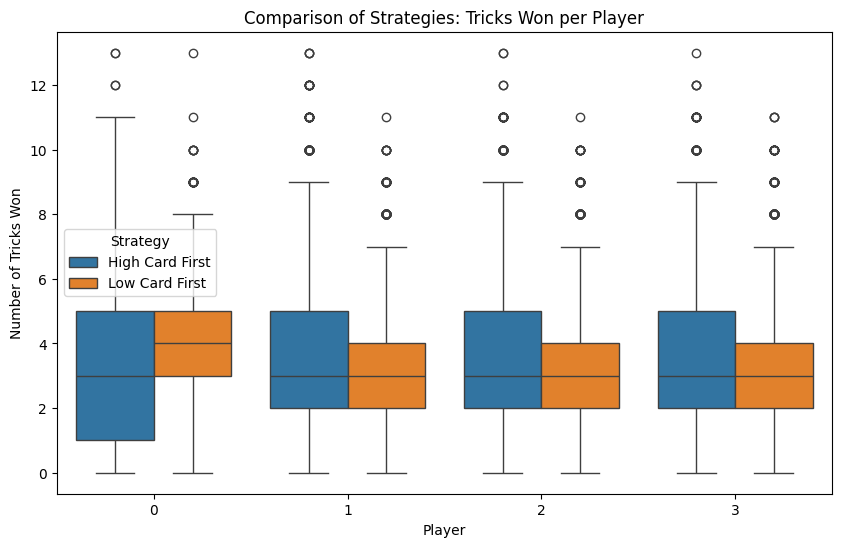

In [ ]:
import random
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Function to generate and shuffle deck
def generate_deck():
    deck = [(rank, suit) for suit in SUITS for rank in RANKS]
    random.shuffle(deck)
    return deck

# Function to deal hands to players
def deal_cards():
    deck = generate_deck()
    return {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Strategy 1: Play highest card first
def play_high_card_first(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return max(players[player], key=lambda card: RANKS.index(card[0]))  # Play highest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        return max(playable_cards, key=lambda card: RANKS.index(card[0]))  # Highest in same suit
    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from other suit

# Strategy 2: Play lowest card first, then increase
def play_low_card_first(player, lead_suit, trick, players):
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        return min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

# Function to simulate a game based on a given strategy
def play_game(strategy_function):
    players = deal_cards()
    tricks_won = [0] * 4
    lead_player = 0

    for _ in range(13):
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = play_high_card_first(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = strategy_function(player, lead_suit, trick, players)

            players[player].remove(played_card)
            trick.append(played_card)

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won

# Run simulations
num_simulations = 10000
results = []

for _ in range(num_simulations):
    tricks_won_high = play_game(play_high_card_first)
    tricks_won_low = play_game(play_low_card_first)
    for i in range(4):
        results.append({"Player": i, "Tricks Won": tricks_won_high[i], "Strategy": "High Card First"})
        results.append({"Player": i, "Tricks Won": tricks_won_low[i], "Strategy": "Low Card First"})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Visualization using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Player", y="Tricks Won", hue="Strategy", data=df)
plt.title("Comparison of Strategies: Tricks Won per Player")
plt.xlabel("Player")
plt.ylabel("Number of Tricks Won")
plt.legend(title="Strategy")
plt.show()

High Card First Strategy vs Low Card First Strategy

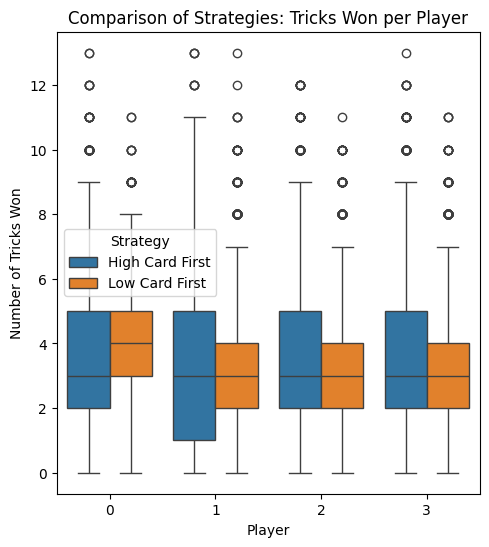

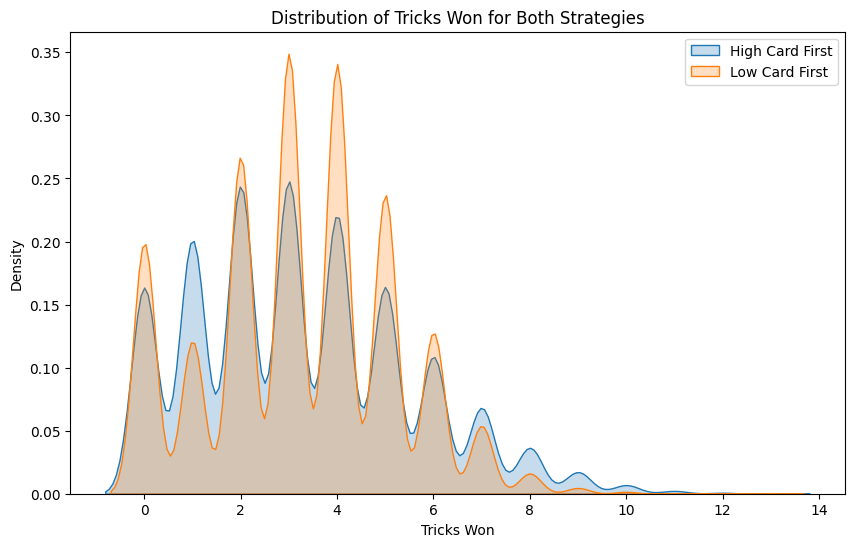

In [ ]:
import random
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Function to generate and shuffle deck
def generate_deck():
    deck = [(rank, suit) for suit in SUITS for rank in RANKS]
    random.shuffle(deck)
    return deck

# Function to deal hands to players
def deal_cards():
    deck = generate_deck()
    return {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Strategy 1: Play highest card first
def play_high_card_first(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return max(players[player], key=lambda card: RANKS.index(card[0]))  # Play highest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        return max(playable_cards, key=lambda card: RANKS.index(card[0]))  # Highest in same suit
    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from other suit

# Strategy 2: Play lowest card first, then increase
def play_low_card_first(player, lead_suit, trick, players):
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        return min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

# Function to simulate a game based on a given strategy
def play_game(strategy_function):
    players = deal_cards()
    tricks_won = [0] * 4
    lead_player = 0

    for _ in range(13):
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = play_high_card_first(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = strategy_function(player, lead_suit, trick, players)

            players[player].remove(played_card)
            trick.append(played_card)

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won

# Run simulations
num_simulations = 10000
results = []

for _ in range(num_simulations):
    tricks_won_high = play_game(play_high_card_first)
    tricks_won_low = play_game(play_low_card_first)
    for i in range(4):
        results.append({"Player": i, "Tricks Won": tricks_won_high[i], "Strategy": "High Card First"})
        results.append({"Player": i, "Tricks Won": tricks_won_low[i], "Strategy": "Low Card First"})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Visualization using seaborn
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x="Player", y="Tricks Won", hue="Strategy", data=df)
plt.title("Comparison of Strategies: Tricks Won per Player")
plt.xlabel("Player")
plt.ylabel("Number of Tricks Won")
plt.legend(title="Strategy")


# Normal distribution curve
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Strategy"] == "High Card First"]["Tricks Won"], label="High Card First", fill=True)
sns.kdeplot(df[df["Strategy"] == "Low Card First"]["Tricks Won"], label="Low Card First", fill=True)
plt.title("Distribution of Tricks Won for Both Strategies")
plt.xlabel("Tricks Won")
plt.ylabel("Density")
plt.legend()
plt.show()

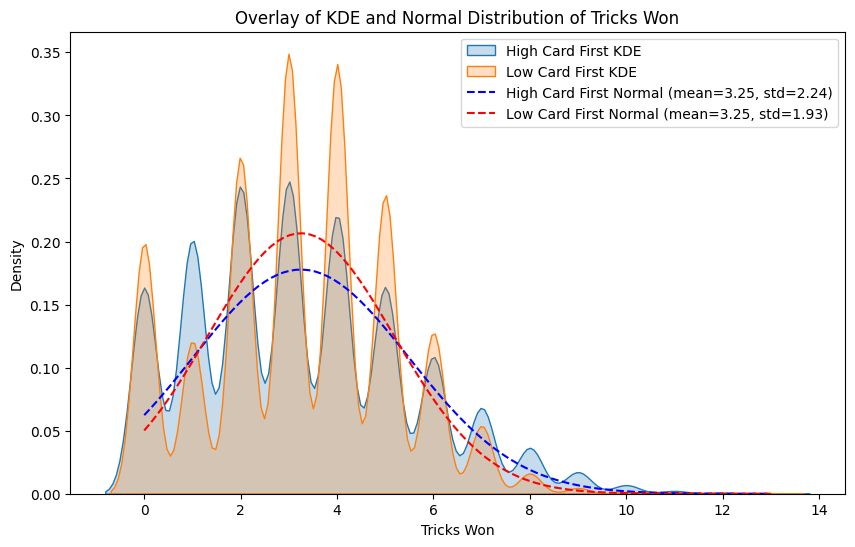

In [ ]:
# Calculate mean and standard deviation for both strategies
high_card_mean = df[df["Strategy"] == "High Card First"]["Tricks Won"].mean()
high_card_std = df[df["Strategy"] == "High Card First"]["Tricks Won"].std()

low_card_mean = df[df["Strategy"] == "Low Card First"]["Tricks Won"].mean()
low_card_std = df[df["Strategy"] == "Low Card First"]["Tricks Won"].std()

# Generate x values
x = np.linspace(0, 13, 100)

# Generate normal distribution curves
y_high = (1 / (high_card_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - high_card_mean) / high_card_std) ** 2)
y_low = (1 / (low_card_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - low_card_mean) / low_card_std) ** 2)

# Plot the original KDE distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Strategy"] == "High Card First"]["Tricks Won"], label="High Card First KDE", fill=True, cmap="viridis")
sns.kdeplot(df[df["Strategy"] == "Low Card First"]["Tricks Won"], label="Low Card First KDE", fill=True, cmap="viridis")

# Overlay normal distribution curves
plt.plot(x, y_high, label=f"High Card First Normal (mean={high_card_mean:.2f}, std={high_card_std:.2f})", color='blue', linestyle='dashed')
plt.plot(x, y_low, label=f"Low Card First Normal (mean={low_card_mean:.2f}, std={low_card_std:.2f})", color='red', linestyle='dashed')

# Labels and title
plt.title("Overlay of KDE and Normal Distribution of Tricks Won")
plt.xlabel("Tricks Won")
plt.ylabel("Density")
plt.legend()
plt.show()

|Difference between team A and team B|

<Figure size 1200x600 with 0 Axes>

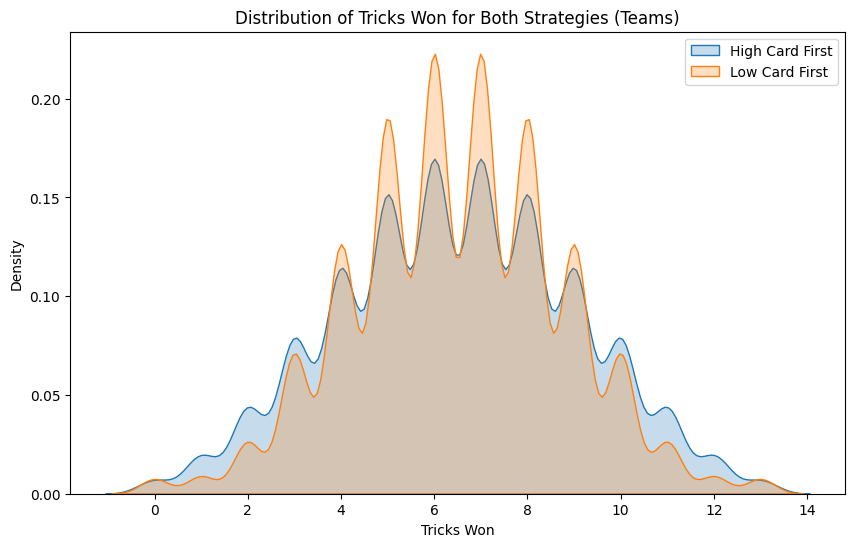

In [ ]:
import random
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Function to generate and shuffle deck
def generate_deck():
    deck = [(rank, suit) for suit in SUITS for rank in RANKS]
    random.shuffle(deck)
    return deck

# Function to deal hands to players
def deal_cards():
    deck = generate_deck()
    return {i: sorted(deck[i*13:(i+1)*13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Strategy 1: Play highest card first
def play_high_card_first(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return max(players[player], key=lambda card: RANKS.index(card[0]))  # Play highest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        return max(playable_cards, key=lambda card: RANKS.index(card[0]))  # Highest in same suit
    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from other suit

# Strategy 2: Play lowest card first, then increase
def play_low_card_first(player, lead_suit, trick, players):
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        return min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

# Function to simulate a game based on a given strategy
def play_game(strategy_function):
    players = deal_cards()
    tricks_won = [0] * 4
    lead_player = 0

    for _ in range(13):
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = play_high_card_first(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = strategy_function(player, lead_suit, trick, players)

            players[player].remove(played_card)
            trick.append(played_card)

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won

# Run simulations
num_simulations = 10000
results = []

for _ in range(num_simulations):
    tricks_won_high = play_game(play_high_card_first)
    tricks_won_low = play_game(play_low_card_first)
    team_A_high = tricks_won_high[0] + tricks_won_high[2]
    team_B_high = tricks_won_high[1] + tricks_won_high[3]
    team_A_low = tricks_won_low[0] + tricks_won_low[2]
    team_B_low = tricks_won_low[1] + tricks_won_low[3]

    results.append({"Team": "Team A", "Tricks Won": team_A_high, "Strategy": "High Card First"})
    results.append({"Team": "Team B", "Tricks Won": team_B_high, "Strategy": "High Card First"})
    results.append({"Team": "Team A", "Tricks Won": team_A_low, "Strategy": "Low Card First"})
    results.append({"Team": "Team B", "Tricks Won": team_B_low, "Strategy": "Low Card First"})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Visualization using seaborn
plt.figure(figsize=(12, 6))


# Normal distribution curve for both teams
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Strategy"] == "High Card First"]["Tricks Won"], label="High Card First", fill=True)
sns.kdeplot(df[df["Strategy"] == "Low Card First"]["Tricks Won"], label="Low Card First", fill=True)
plt.title("Distribution of Tricks Won for Both Strategies (Teams)")
plt.xlabel("Tricks Won")
plt.ylabel("Density")
plt.legend()
plt.show()


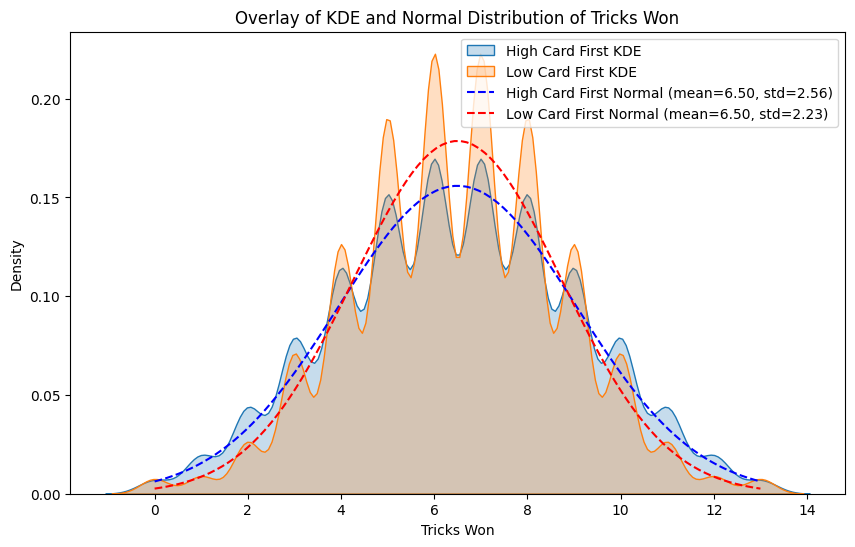

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Calculate mean and standard deviation for both strategies
high_card_mean = df[df["Strategy"] == "High Card First"]["Tricks Won"].mean()
high_card_std = df[df["Strategy"] == "High Card First"]["Tricks Won"].std()

low_card_mean = df[df["Strategy"] == "Low Card First"]["Tricks Won"].mean()
low_card_std = df[df["Strategy"] == "Low Card First"]["Tricks Won"].std()

# Generate x values
x = np.linspace(0, 13, 100)

# Generate normal distribution curves
y_high = (1 / (high_card_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - high_card_mean) / high_card_std) ** 2)
y_low = (1 / (low_card_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - low_card_mean) / low_card_std) ** 2)

# Plot the original KDE distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Strategy"] == "High Card First"]["Tricks Won"], label="High Card First KDE", fill=True, cmap="viridis")
sns.kdeplot(df[df["Strategy"] == "Low Card First"]["Tricks Won"], label="Low Card First KDE", fill=True, cmap="viridis")

# Overlay normal distribution curves
plt.plot(x, y_high, label=f"High Card First Normal (mean={high_card_mean:.2f}, std={high_card_std:.2f})", color='blue', linestyle='dashed')
plt.plot(x, y_low, label=f"Low Card First Normal (mean={low_card_mean:.2f}, std={low_card_std:.2f})", color='red', linestyle='dashed')

# Labels and title
plt.title("Overlay of KDE and Normal Distribution of Tricks Won")
plt.xlabel("Tricks Won")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Add Strategy 3 - General Strategy

In [ ]:
import random
import copy

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Create a deck of cards and shuffle
deck = [(rank, suit) for suit in SUITS for rank in RANKS]
random.shuffle(deck)

# Distribute cards to 4 players
original_players = {
    i: sorted(deck[i * 13:(i + 1) * 13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0])))
    for i in range(4)
}

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Strategy 1: High Card First
def play_high_card_first(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return max(players[player], key=lambda card: RANKS.index(card[0]))  # Play highest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        return max(playable_cards, key=lambda card: RANKS.index(card[0]))  # Highest in same suit
    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from another suit

# Strategy 2: Low Card First
def play_low_card_first(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return min(players[player], key=lambda card: RANKS.index(card[0]))  # Play lowest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        return min(playable_cards, key=lambda card: RANKS.index(card[0]))  # Lowest in same suit
    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from another suit

# Strategy 3: General Strategy
def play_general_strategy(player, lead_suit, trick, players):
    if not trick:  # First player in the trick
        return max(players[player], key=lambda card: RANKS.index(card[0]))  # Play highest card

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))

    return min(players[player], key=lambda card: RANKS.index(card[0]))  # Lowest from another suit

# Function to play a game stepwise
def play_game(strategy_function, strategy_name):
    players = copy.deepcopy(original_players)  # Ensure fresh hands for each game
    tricks_won = [0] * 4
    lead_player = 0  # Start with player 0

    print(f"\n\n===== {strategy_name} Strategy =====\n")

    for round_num in range(13):
        print(f"\nTrick {round_num + 1}:")
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = strategy_function(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = strategy_function(player, lead_suit, trick, players)

            players[player].remove(played_card)
            trick.append(played_card)
            print(f"Player {player} plays {played_card}")

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1
        print(f"Winner of Trick {round_num + 1}: Player {lead_player}")

    return tricks_won

# Print player hands before the game starts
print("\n===== Initial Player Hands =====")
for i in range(4):
    print(f"Player {i}: {original_players[i]}")

# Run all strategies with stepwise output
tricks_won_high = play_game(play_high_card_first, "High Card First")
tricks_won_low = play_game(play_low_card_first, "Low Card First")
tricks_won_general = play_game(play_general_strategy, "General Strategy")

# Calculate team scores
team_A_high = tricks_won_high[0] + tricks_won_high[2]
team_B_high = tricks_won_high[1] + tricks_won_high[3]
team_A_low = tricks_won_low[0] + tricks_won_low[2]
team_B_low = tricks_won_low[1] + tricks_won_low[3]
team_A_general = tricks_won_general[0] + tricks_won_general[2]
team_B_general = tricks_won_general[1] + tricks_won_general[3]

# Print final results
print("\n===== Final Results =====")
print("\nStrategy: High Card First")
for i, wins in enumerate(tricks_won_high):
    print(f"Player {i} won {wins} tricks.")
print(f"Team A (Players 0 & 2) Total Tricks: {team_A_high}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_high}")

print("\nStrategy: Low Card First")
for i, wins in enumerate(tricks_won_low):
    print(f"Player {i} won {wins} tricks.")
print(f"Team A (Players 0 & 2) Total Tricks: {team_A_low}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_low}")

print("\nStrategy: General Strategy")
for i, wins in enumerate(tricks_won_general):
    print(f"Player {i} won {wins} tricks.")
print(f"Team A (Players 0 & 2) Total Tricks: {team_A_general}")
print(f"Team B (Players 1 & 3) Total Tricks: {team_B_general}")



===== Initial Player Hands =====
Player 0: [('6', 'Spades'), ('8', 'Spades'), ('Q', 'Spades'), ('2', 'Hearts'), ('3', 'Hearts'), ('Q', 'Hearts'), ('6', 'Diamonds'), ('Q', 'Diamonds'), ('3', 'Clubs'), ('4', 'Clubs'), ('5', 'Clubs'), ('7', 'Clubs'), ('J', 'Clubs')]
Player 1: [('5', 'Spades'), ('7', 'Spades'), ('K', 'Spades'), ('4', 'Hearts'), ('10', 'Hearts'), ('A', 'Hearts'), ('4', 'Diamonds'), ('5', 'Diamonds'), ('8', 'Diamonds'), ('K', 'Diamonds'), ('9', 'Clubs'), ('10', 'Clubs'), ('A', 'Clubs')]
Player 2: [('2', 'Spades'), ('3', 'Spades'), ('4', 'Spades'), ('5', 'Hearts'), ('9', 'Hearts'), ('J', 'Hearts'), ('K', 'Hearts'), ('7', 'Diamonds'), ('10', 'Diamonds'), ('J', 'Diamonds'), ('A', 'Diamonds'), ('6', 'Clubs'), ('Q', 'Clubs')]
Player 3: [('9', 'Spades'), ('10', 'Spades'), ('J', 'Spades'), ('A', 'Spades'), ('6', 'Hearts'), ('7', 'Hearts'), ('8', 'Hearts'), ('2', 'Diamonds'), ('3', 'Diamonds'), ('9', 'Diamonds'), ('2', 'Clubs'), ('8', 'Clubs'), ('K', 'Clubs')]


===== High Card Fir

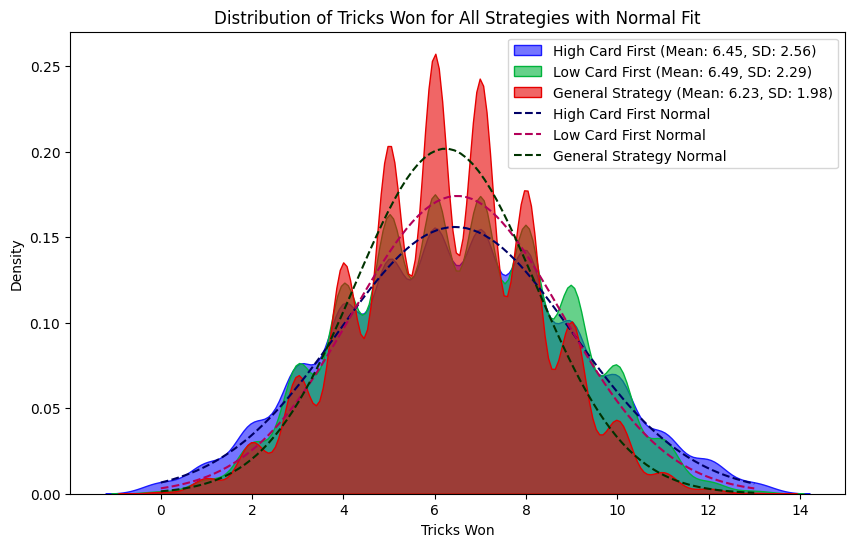

In [ ]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Define card ranks and suits
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]

# Function to generate a shuffled deck
def get_shuffled_deck():
    deck = [(rank, suit) for suit in SUITS for rank in RANKS]
    random.shuffle(deck)
    return deck

# Function to distribute cards to players
def deal_cards(deck):
    return {
        i: sorted(deck[i * 13:(i + 1) * 13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0])))
        for i in range(4)
    }

# Function to determine the winner of a trick
def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

# Strategy 1: High Card First
def play_high_card_first(player, lead_suit, trick, players):
    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0]))

    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    return max(playable_cards, key=lambda card: RANKS.index(card[0])) if playable_cards else min(players[player], key=lambda card: RANKS.index(card[0]))

# Strategy 2: Low Card First
def play_low_card_first(player, lead_suit, trick, players):
    if not trick:
        return min(players[player], key=lambda card: RANKS.index(card[0]))

    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    return min(playable_cards, key=lambda card: RANKS.index(card[0])) if playable_cards else min(players[player], key=lambda card: RANKS.index(card[0]))

# Strategy 3: General Strategy
def play_general_strategy(player, lead_suit, trick, players):
    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0]))

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))

    return min(players[player], key=lambda card: RANKS.index(card[0]))

# Function to play a full game with a given strategy
def play_game(strategy_function):
    deck = get_shuffled_deck()
    players = deal_cards(deck)
    tricks_won = [0] * 4
    lead_player = 0

    for _ in range(13):
        trick = []
        lead_suit = None

        for i in range(4):
            player = (lead_player + i) % 4
            played_card = strategy_function(player, lead_suit if i > 0 else None, trick, players)
            players[player].remove(played_card)
            trick.append(played_card)
            if i == 0:
                lead_suit = played_card[1]

        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won[0] + tricks_won[2]

# Run multiple simulations
num_simulations = 10000
high_card_results = []
low_card_results = []
general_results = []

for _ in range(num_simulations):
    high_card_results.append(play_game(play_high_card_first))
    low_card_results.append(play_game(play_low_card_first))
    general_results.append(play_game(play_general_strategy))

# Compute mean and standard deviation
mean_high, std_high = np.mean(high_card_results), np.std(high_card_results)
mean_low, std_low = np.mean(low_card_results), np.std(low_card_results)
mean_general, std_general = np.mean(general_results), np.std(general_results)

# Generate x values for normal distribution curves
x_values = np.linspace(0, 13, 100)

# Compute normal distribution curves
high_card_normal = norm.pdf(x_values, mean_high, std_high)
low_card_normal = norm.pdf(x_values, mean_low, std_low)
general_normal = norm.pdf(x_values, mean_general, std_general)



# Plot KDE and normal distributions with soft, distinct colors
plt.figure(figsize=(10, 6))
sns.kdeplot(high_card_results, fill=True, label=f"High Card First (Mean: {mean_high:.2f}, SD: {std_high:.2f})", color="#1a1aff", alpha=0.6)
sns.kdeplot(low_card_results, fill=True, label=f"Low Card First (Mean: {mean_low:.2f}, SD: {std_low:.2f})", color="#00b33c", alpha=0.6)
sns.kdeplot(general_results, fill=True, label=f"General Strategy (Mean: {mean_general:.2f}, SD: {std_general:.2f})", color="#e60000", alpha=0.6)

# Plot normal distribution curves
plt.plot(x_values, high_card_normal, label="High Card First Normal", color="#000066", linestyle="dashed")
plt.plot(x_values, low_card_normal, label="Low Card First Normal", color="#b30059", linestyle="dashed")
plt.plot(x_values, general_normal, label="General Strategy Normal", color="#003300", linestyle="dashed")

# Labels and title
plt.xlabel("Tricks Won")
plt.ylabel("Density")
plt.title("Distribution of Tricks Won for All Strategies with Normal Fit")
plt.legend()
plt.show()


Using the most likely strategy a player can call 0,1,2 or 3 NT, we have to fix a player and check whether his team completes (that number+6)  tricks.

In [ ]:
import random
import copy
import itertools
import numpy as np

RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]
POINTS = {"A": 5, "K": 4, "Q": 3, "J": 2, "10": 1}

def generate_deck():
    return list(itertools.product(RANKS, SUITS))

def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    return {i: sorted(deck[i * 13:(i + 1) * 13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

def calculate_points(hand):
    return sum(POINTS.get(card[0], 0) for card in hand)

def evaluate_hand(points):
    if points >= 30:
        return 3  # 3 No Trump
    elif points >= 25:
        return 2  # 2 No Trump
    elif points >= 20:
        return 1  # 1 No Trump
    else:
        return 0  # No Trump

def play_general_strategy(player, lead_suit, trick, players):
    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0]))
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

def play_game(players):
    tricks_won = [0] * 4
    lead_player = 0
    for _ in range(13):
        trick = []
        lead_suit = None
        for i in range(4):
            player = (lead_player + i) % 4
            played_card = play_general_strategy(player, lead_suit, trick, players) if i else play_general_strategy(player, None, trick, players)
            if i == 0:
                lead_suit = played_card[1]
            players[player].remove(played_card)
            trick.append(played_card)
        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1
    return tricks_won

def simulate_games(n):
    call_counts = np.zeros(4, dtype=int)  # Count of 0,1,2,3 No Trump calls
    success_counts = np.zeros(4, dtype=int)  # Count of successful calls

    for _ in range(n):
        players = deal_cards()
        call_p2 = evaluate_hand(calculate_points(players[1]))
        if call_p2 > 0:
            call_counts[call_p2] += 1
            tricks_won = play_game(copy.deepcopy(players))
            team_B_tricks = tricks_won[1] + tricks_won[3]
            required_tricks = 6 + call_p2
            if team_B_tricks >= required_tricks:
                success_counts[call_p2] += 1

    failure_counts = call_counts - success_counts

    return call_counts[1:], success_counts[1:], failure_counts[1:]

# Run 10,00000 simulations
n_simulations = 1000000
call_counts, success_counts, failure_counts = simulate_games(n_simulations)

# Output matrix
print("\n===== Simulation Results (1000000 Games) =====")
print("        1NT   2NT   3NT")
print(f"Calls:   {call_counts[0]:<5} {call_counts[1]:<5} {call_counts[2]:<5}")
print(f"Yes:     {success_counts[0]:<5} {success_counts[1]:<5} {success_counts[2]:<5}")
print(f"No:      {failure_counts[0]:<5} {failure_counts[1]:<5} {failure_counts[2]:<5}")



===== Simulation Results (1000000 Games) =====
        1NT   2NT   3NT
Calls:   157907 38700 5007 
Yes:     117998 27108 3323 
No:      39909 11592 1684 


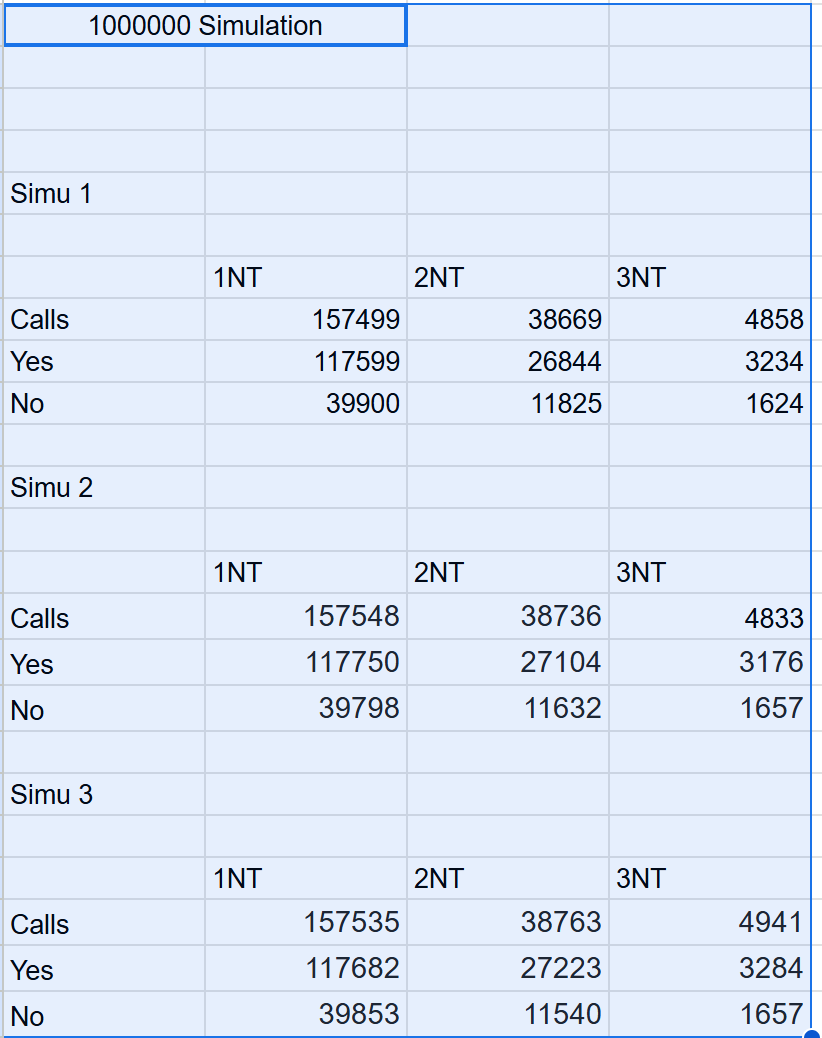

20-25-30


25-30-35

In [ ]:
import random
import copy
import itertools
import numpy as np

RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]
POINTS = {"A": 5, "K": 4, "Q": 3, "J": 2, "10": 1}

def generate_deck():
    return list(itertools.product(RANKS, SUITS))

def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    return {i: sorted(deck[i * 13:(i + 1) * 13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

def calculate_points(hand):
    return sum(POINTS.get(card[0], 0) for card in hand)

def evaluate_hand(points):
    if points >= 35:
        return 3  # 3 No Trump
    elif points >= 30:
        return 2  # 2 No Trump
    elif points >= 25:
        return 1  # 1 No Trump
    else:
        return 0  # No Trump

def play_general_strategy(player, lead_suit, trick, players):
    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0]))
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

def play_game(players):
    tricks_won = [0] * 4
    lead_player = 0
    for _ in range(13):
        trick = []
        lead_suit = None
        for i in range(4):
            player = (lead_player + i) % 4
            played_card = play_general_strategy(player, lead_suit, trick, players) if i else play_general_strategy(player, None, trick, players)
            if i == 0:
                lead_suit = played_card[1]
            players[player].remove(played_card)
            trick.append(played_card)
        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1
    return tricks_won

def simulate_games(n):
    call_counts = np.zeros(4, dtype=int)  # Count of 0,1,2,3 No Trump calls
    success_counts = np.zeros(4, dtype=int)  # Count of successful calls

    for _ in range(n):
        players = deal_cards()
        call_p2 = evaluate_hand(calculate_points(players[1]))
        if call_p2 > 0:
            call_counts[call_p2] += 1
            tricks_won = play_game(copy.deepcopy(players))
            team_B_tricks = tricks_won[1] + tricks_won[3]
            required_tricks = 6 + call_p2
            if team_B_tricks >= required_tricks:
                success_counts[call_p2] += 1

    failure_counts = call_counts - success_counts

    return call_counts[1:], success_counts[1:], failure_counts[1:]

# Run 10,000 simulations
n_simulations = 1000000
call_counts, success_counts, failure_counts = simulate_games(n_simulations)

# Output matrix
print("\n===== Simulation Results (1000000 Games) =====")
print("        1NT   2NT   3NT")
print(f"Calls:   {call_counts[0]:<5} {call_counts[1]:<5} {call_counts[2]:<5}")
print(f"Yes:     {success_counts[0]:<5} {success_counts[1]:<5} {success_counts[2]:<5}")
print(f"No:      {failure_counts[0]:<5} {failure_counts[1]:<5} {failure_counts[2]:<5}")



===== Simulation Results (1000000 Games) =====
        1NT   2NT   3NT
Calls:   38409 4587  265  
Yes:     33492 3834  222  
No:      4917  753   43   


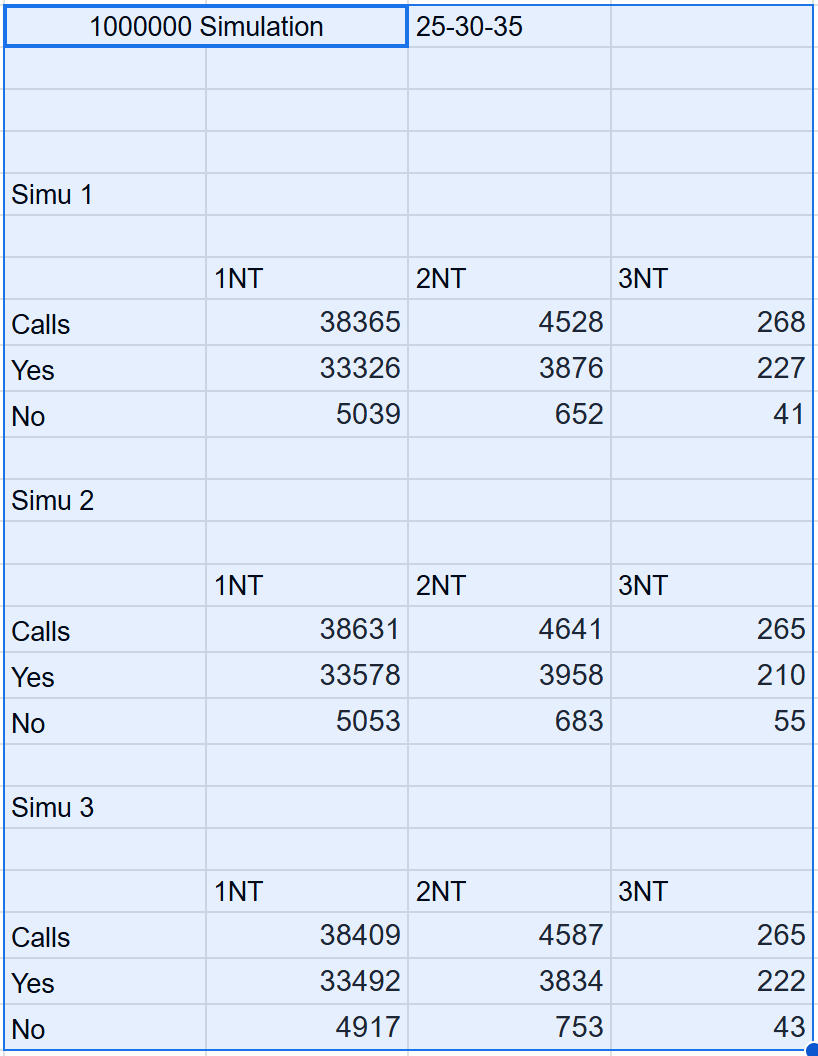

In [ ]:
import random
import copy
import itertools
import numpy as np

RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
SUITS = ["Spades", "Hearts", "Diamonds", "Clubs"]
POINTS = {"A": 5, "K": 4, "Q": 3, "J": 2, "10": 1}

def generate_deck():
    return list(itertools.product(RANKS, SUITS))

def deal_cards():
    deck = generate_deck()
    random.shuffle(deck)
    return {i: sorted(deck[i * 13:(i + 1) * 13], key=lambda card: (SUITS.index(card[1]), RANKS.index(card[0]))) for i in range(4)}

def calculate_points(hand):
    return sum(POINTS.get(card[0], 0) for card in hand)

def evaluate_hand(points):
    if points >= 40:
        return 3  # 3 No Trump
    elif points >= 35:
        return 2  # 2 No Trump
    elif points >= 30:
        return 1  # 1 No Trump
    else:
        return 0  # No Trump

def play_general_strategy(player, lead_suit, trick, players):
    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0]))
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

def play_game(players):
    tricks_won = [0] * 4
    lead_player = 0
    for _ in range(13):
        trick = []
        lead_suit = None
        for i in range(4):
            player = (lead_player + i) % 4
            played_card = play_general_strategy(player, lead_suit, trick, players) if i else play_general_strategy(player, None, trick, players)
            if i == 0:
                lead_suit = played_card[1]
            players[player].remove(played_card)
            trick.append(played_card)
        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1
    return tricks_won

def simulate_games(n):
    call_counts = np.zeros(4, dtype=int)  # Count of 0,1,2,3 No Trump calls
    success_counts = np.zeros(4, dtype=int)  # Count of successful calls

    for _ in range(n):
        players = deal_cards()
        call_p2 = evaluate_hand(calculate_points(players[1]))
        if call_p2 > 0:
            call_counts[call_p2] += 1
            tricks_won = play_game(copy.deepcopy(players))
            team_B_tricks = tricks_won[1] + tricks_won[3]
            required_tricks = 6 + call_p2
            if team_B_tricks >= required_tricks:
                success_counts[call_p2] += 1

    failure_counts = call_counts - success_counts

    return call_counts[1:], success_counts[1:], failure_counts[1:]

# Run 10,000 simulations
n_simulations = 1000000
call_counts, success_counts, failure_counts = simulate_games(n_simulations)

# Output matrix
print("\n===== Simulation Results (1000000 Games) =====")
print("        1NT   2NT   3NT")
print(f"Calls:   {call_counts[0]:<5} {call_counts[1]:<5} {call_counts[2]:<5}")
print(f"Yes:     {success_counts[0]:<5} {success_counts[1]:<5} {success_counts[2]:<5}")
print(f"No:      {failure_counts[0]:<5} {failure_counts[1]:<5} {failure_counts[2]:<5}")


===== Simulation Results (1000000 Games) =====
        1NT   2NT   3NT
Calls:   4683  273   6    
Yes:     4450  261   6    
No:      233   12    0    


<ipython-input-4-2e456aa732f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bootstrap_sample, x="Win/Loss", palette="coolwarm")


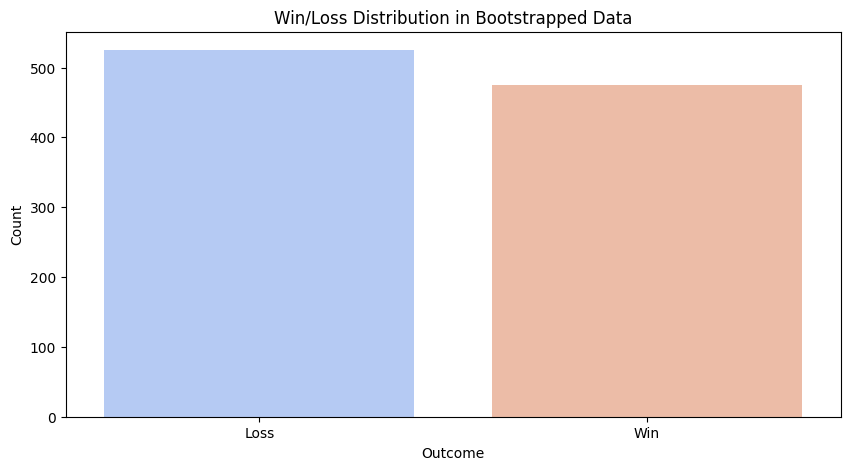

<ipython-input-4-2e456aa732f2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bootstrap_sample[bootstrap_sample["Win/Loss"] == "Win"], x="Bidding Player", palette="viridis")


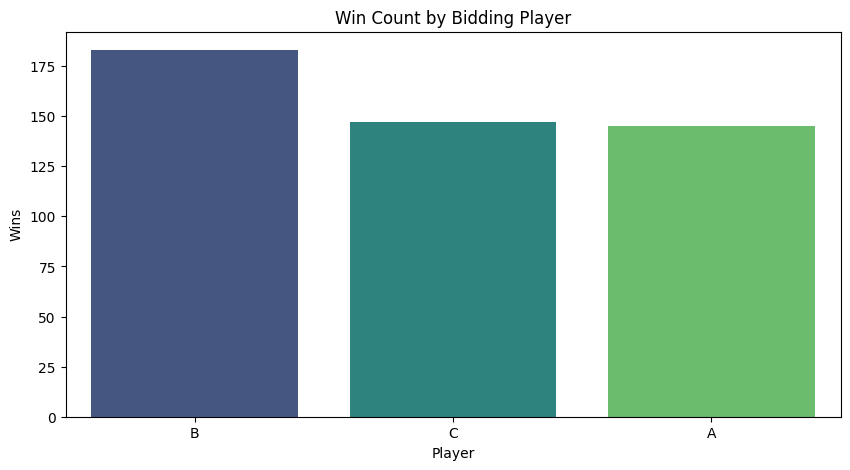

<ipython-input-4-2e456aa732f2>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bootstrap_sample, y="Trump Color", order=bootstrap_sample["Trump Color"].value_counts().index, palette="magma")


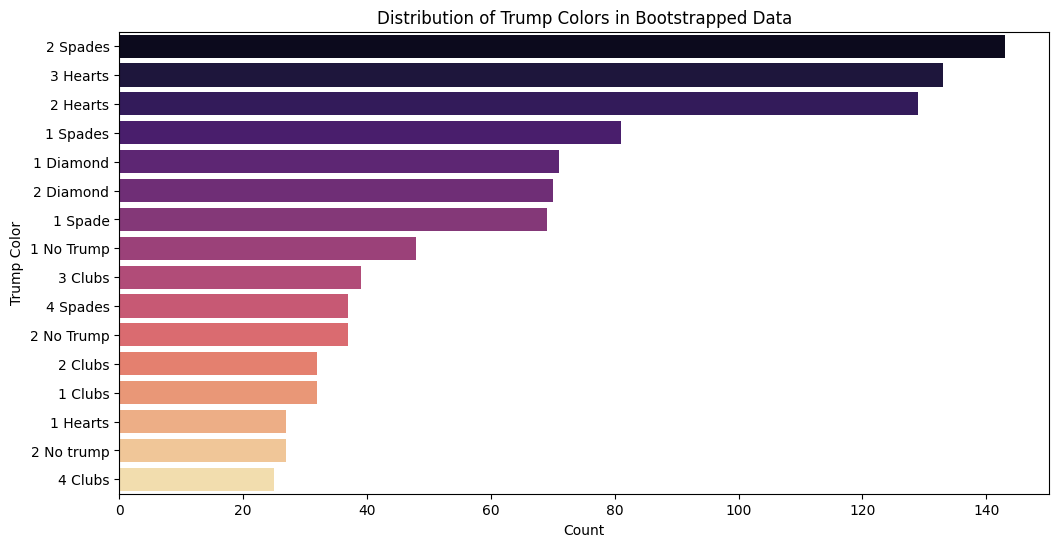

<ipython-input-4-2e456aa732f2>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bootstrap_sample, x="Double/Redouble", palette="pastel")


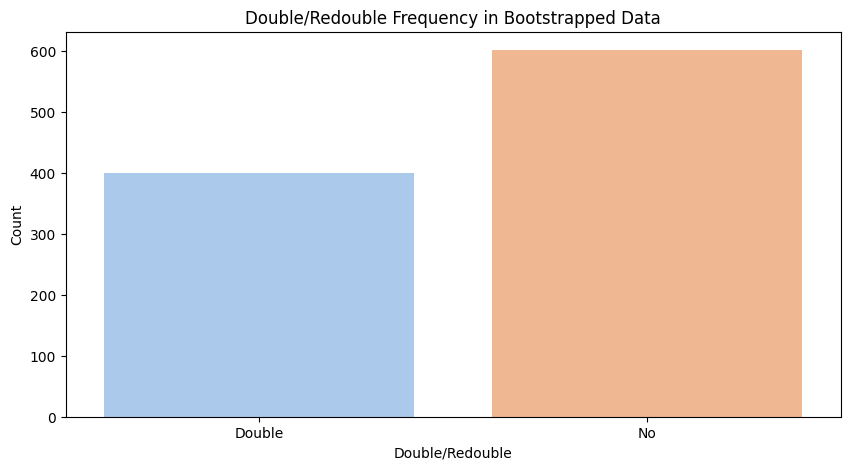

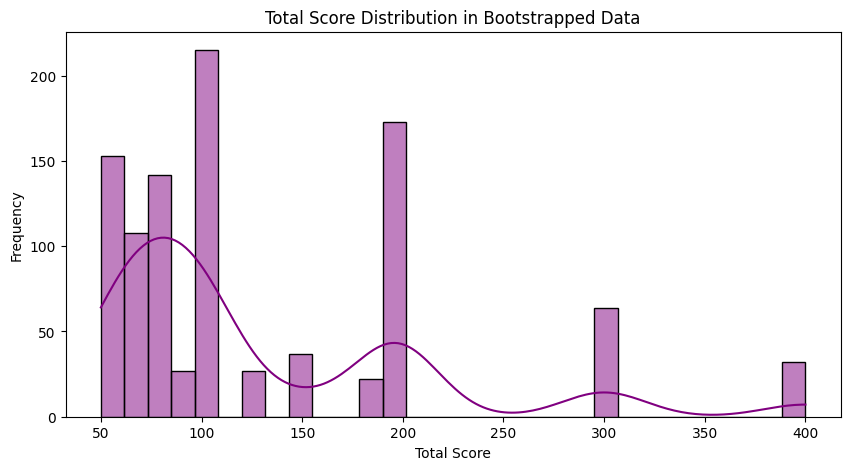

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the bootstrapped dataset
bootstrap_sample = pd.read_csv("/content/bootstrap_sample.csv")

# Win/Loss distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=bootstrap_sample, x="Win/Loss", palette="coolwarm")
plt.title("Win/Loss Distribution in Bootstrapped Data")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

# Bidding Player Win Count
plt.figure(figsize=(10, 5))
sns.countplot(data=bootstrap_sample[bootstrap_sample["Win/Loss"] == "Win"], x="Bidding Player", palette="viridis")
plt.title("Win Count by Bidding Player")
plt.xlabel("Player")
plt.ylabel("Wins")
plt.show()

# Trump Color Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=bootstrap_sample, y="Trump Color", order=bootstrap_sample["Trump Color"].value_counts().index, palette="magma")
plt.title("Distribution of Trump Colors in Bootstrapped Data")
plt.xlabel("Count")
plt.ylabel("Trump Color")
plt.show()

# Double/Redouble Analysis
plt.figure(figsize=(10, 5))
sns.countplot(data=bootstrap_sample, x="Double/Redouble", palette="pastel")
plt.title("Double/Redouble Frequency in Bootstrapped Data")
plt.xlabel("Double/Redouble")
plt.ylabel("Count")
plt.show()

# Player Scores Distribution (Summing Player A, B, C Scores)
bootstrap_sample["Total Score"] = bootstrap_sample["Player A"] + bootstrap_sample["Player B"] + bootstrap_sample["Player C"]

plt.figure(figsize=(10, 5))
sns.histplot(bootstrap_sample["Total Score"], bins=30, kde=True, color="purple")
plt.title("Total Score Distribution in Bootstrapped Data")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()


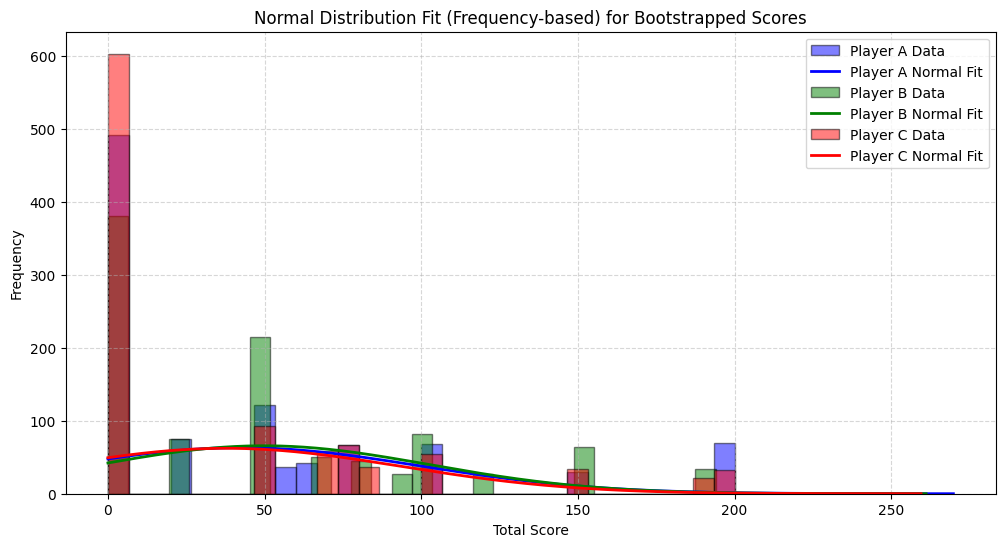

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the bootstrapped dataset
bootstrap_sample = pd.read_csv("/content/bootstrap_sample.csv")

# Set up the figure
plt.figure(figsize=(12, 6))

# Define colors for each player
colors = {"Player A": "blue", "Player B": "green", "Player C": "red"}

# Loop through each player and plot histogram + normal curve
for player in ["Player A", "Player B", "Player C"]:
    # Get player data
    data = bootstrap_sample[player]

    # Compute mean and standard deviation
    mean_score = np.mean(data)
    std_dev = np.std(data)

    # Ensure the x-axis starts from 0 (no negative values)
    x_min = max(0, mean_score - 4 * std_dev)
    x_max = mean_score + 4 * std_dev
    x = np.linspace(x_min, x_max, 1000)

    # Compute Normal Distribution Curve
    y = norm.pdf(x, mean_score, std_dev) * len(data) * (x_max - x_min) / 30  # Scale for frequency

    # Plot histogram (frequency-based)
    plt.hist(data, bins=30, alpha=0.5, color=colors[player], label=f"{player} Data", edgecolor="black")

    # Plot normal distribution curve
    plt.plot(x, y, color=colors[player], linewidth=2, label=f"{player} Normal Fit")

# Labels & Title
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.title("Normal Distribution Fit (Frequency-based) for Bootstrapped Scores")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the graph
plt.show()


Player A
Mean: 43.62
Standard Deviation: 57.56
Skewness: 1.36 (Right-skewed)
Kurtosis: 1.02 (Leptokurtic - slightly peaked)

Player B
Mean: 50.25
Standard Deviation: 54.13
Skewness: 0.91 (Moderately right-skewed)
Kurtosis: -0.04 (Platykurtic - flatter than normal)

Player C
Mean: 41.68
Standard Deviation: 58.17
Skewness: 1.33 (Right-skewed)
Kurtosis: 0.88 (Slightly peaked)

In [ ]:
import itertools
import copy

# Define ranks and suits
RANKS = "23456789TJQKA"
SUITS = "CDHS"

def generate_deck():
    return [rank + suit for rank in RANKS for suit in SUITS]

def deal_fixed_hands(team_B_cards):
    deck = set(generate_deck())
    team_B_set = set(team_B_cards)
    team_A_cards = list(deck - team_B_set)
    return [list(team_A_cards[:13]), list(team_A_cards[13:]), list(team_B_cards[:13]), list(team_B_cards[13:])]

def get_trick_winner(trick, lead_suit):
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

def play_general_strategy(player, lead_suit, trick, players):
    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0]))
    playable_cards = [card for card in players[player] if card[1] == lead_suit]
    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))
    return min(players[player], key=lambda card: RANKS.index(card[0]))

def play_game_with_fixed_hands(players):
    players = [list(hand) for hand in players]  # Ensure hands are mutable lists
    tricks_won = [0] * 4
    lead_player = 0

    for _ in range(13):
        trick = []
        lead_suit = None
        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = play_general_strategy(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = play_general_strategy(player, lead_suit, trick, players)
            players[player].remove(played_card)
            trick.append(played_card)
        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won

def count_team_A_wins():
    deck = generate_deck()
    team_A_tricks = {}

    for team_B_cards in itertools.combinations(deck, 26):
        players = deal_fixed_hands(team_B_cards)
        tricks = play_game_with_fixed_hands(players)
        team_A_score = tricks[0] + tricks[2]
        team_A_tricks[team_A_score] = team_A_tricks.get(team_A_score, 0) + 1

    return team_A_tricks

# Run the count process
team_A_tricks = count_team_A_wins()
print("Team A Trick Wins Count:", team_A_tricks)

In [ ]:
from itertools import combinations
from collections import defaultdict
import random
import math

def generate_deck():
    """Generates a standard 52-card deck."""
    RANKS = "23456789TJQKA"
    SUITS = "CDHS"
    return [rank + suit for rank in RANKS for suit in SUITS]

def deal_hands():
    """Randomly deals hands for Player 2 and Player 4, then generates all valid splits for Player 1 and Player 3."""
    deck = generate_deck()
    random.shuffle(deck)

    # Assign 13 random cards to Player 2
    player_2 = set(random.sample(deck, 13))
    remaining_deck = list(set(deck) - player_2)

    # Assign 13 random cards to Player 4
    player_4 = set(random.sample(remaining_deck, 13))
    remaining_deck = list(set(remaining_deck) - player_4)

    # Generate all possible ways to split the remaining 26 cards between Player 1 and Player 3
    all_team_A_splits = list(combinations(remaining_deck, 13))  # 26C13 combinations
    return player_2, player_4, remaining_deck, all_team_A_splits

def get_trick_winner(trick, lead_suit):
    """Determines the winner of a trick based on the lead suit."""
    RANKS = "23456789TJQKA"
    valid_cards = [card for card in trick if card[1] == lead_suit]
    winning_card = max(valid_cards, key=lambda card: RANKS.index(card[0]))
    return trick.index(winning_card)

def play_general_strategy(player, lead_suit, trick, players):
    """Plays a card based on simple strategy."""
    RANKS = "23456789TJQKA"

    if not trick:
        return max(players[player], key=lambda card: RANKS.index(card[0])) if players[player] else None

    playable_cards = [card for card in players[player] if card[1] == lead_suit]

    if playable_cards:
        higher_cards = [card for card in playable_cards if RANKS.index(card[0]) > RANKS.index(trick[0][0])]
        return max(higher_cards, key=lambda card: RANKS.index(card[0])) if higher_cards else min(playable_cards, key=lambda card: RANKS.index(card[0]))

    # If no playable cards, play the lowest-ranked card in hand
    # Check if card[0] is in RANKS before calling index
    return min(players[player], key=lambda card: RANKS.index(card[0]) if card[0] in RANKS else -1) if players[player] else None


def play_game_with_fixed_hands(players):
    """Simulates a bridge game using predefined hands."""
    players = [list(hand) for hand in players]  # Ensure hands are mutable lists
    tricks_won = [0] * 4
    lead_player = 0

    for _ in range(13):
        trick = []
        lead_suit = None
        for i in range(4):
            player = (lead_player + i) % 4
            if i == 0:
                played_card = play_general_strategy(player, None, trick, players)
                lead_suit = played_card[1]
            else:
                played_card = play_general_strategy(player, lead_suit, trick, players)
            players[player].remove(played_card)
            trick.append(played_card)
        winner = get_trick_winner(trick, lead_suit)
        lead_player = (lead_player + winner) % 4
        tricks_won[lead_player] += 1

    return tricks_won

def count_team_A_wins():
    """Counts the number of times Team A wins across all possible distributions of Player 1 and 3."""
    deck = generate_deck()
    team_A_tricks = {}

    # This part was wrong before the fix:
    # for team_B_cards in combinations(deck, 26):
    #     players = deal_hands()

    # Fix: Use the dealt hands (player_2, player_4) and iterate through possible splits for remaining_deck
    player_2, player_4, remaining_deck, all_team_A_splits = deal_hands()
    for team_A_split in all_team_A_splits:
        player_1 = list(team_A_split)  # Player 1 hand
        player_3 = list(set(remaining_deck) - set(team_A_split))  # Player 3 hand
        players = [player_1, player_2, player_3, player_4]  # Order: P1, P2, P3, P4

        # Simulate game and count scores
        tricks = play_game_with_fixed_hands(players)
        team_A_score = tricks[0] + tricks[2]
        team_A_tricks[team_A_score] = team_A_tricks.get(team_A_score, 0) + 1

    return team_A_tricks

# Run the count process
player_2, player_4, remaining_deck, all_team_A_splits = deal_hands()
trick_win_counts = count_team_A_wins()

# Verify the sum of frequencies equals 26C13
total_combinations = sum(trick_win_counts.values())
expected_combinations = math.comb(26, 13)

print("Team A Trick Wins Count:", trick_win_counts)
print("Total Combinations Computed:", total_combinations)
print("Expected Combinations (26C13):", expected_combinations)


Team A Trick Wins Count: {7: 766867, 10: 2571276, 6: 63032, 13: 65601, 8: 2257160, 11: 1634308, 12: 482094, 9: 2560262}
Total Combinations Computed: 10400600
Expected Combinations (26C13): 10400600


In [ ]:
import numpy as np
tricks = np.array([2, 3, 4, 5, 6, 7, 8, 9])
frequencies = np.array([184, 135857, 641176, 1523233, 3265042, 3292222, 1329033, 213853])
total_data = 10400600
mean_tricks = np.sum(tricks * frequencies) / total_data
variance_tricks = np.sum(frequencies * (tricks - mean_tricks) ** 2) / total_data
std_dev_tricks = np.sqrt(variance_tricks)
print(mean_tricks, std_dev_tricks)


6.324784627809934 1.190857248516253


In [ ]:
from scipy.stats import kstest
ks_test = kstest((tricks - mean_tricks) / std_dev_tricks, 'norm')
print(ks_test)


KstestResult(statistic=np.float64(0.3670304350227595), pvalue=np.float64(0.17910440736853805), statistic_location=np.float64(-1.112463000465041), statistic_sign=np.int8(1))


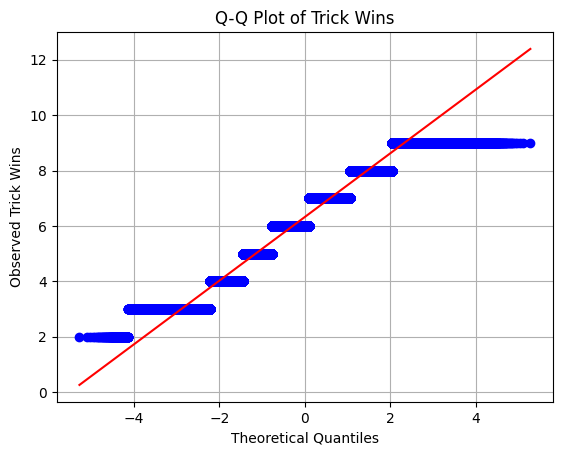

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Observed trick win counts
tricks = np.array([2, 3, 4, 5, 6, 7, 8, 9])
frequencies = np.array([184, 135857, 641176, 1523233, 3265042, 3292222, 1329033, 213853])

# Generate a dataset by repeating each trick win count based on its frequency
data = np.repeat(tricks, frequencies)

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Trick Wins")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Observed Trick Wins")
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import ks_1samp, norm

# Example data: Replace this with your actual trick win data
trick_win_counts = np.array([2, 184, 135857, 641176, 1523233, 3265042, 3292222, 1329033, 213853])

# Normalize data for comparison with a normal distribution
mean_tricks = np.mean(trick_win_counts)
std_tricks = np.std(trick_win_counts)

# Standardize the data
normalized_data = (trick_win_counts - mean_tricks) / std_tricks

# Perform KS test against the standard normal distribution
ks_stat, p_value = ks_1samp(normalized_data, norm.cdf)

print(f"KS Statistic: {ks_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis: The data follows a normal distribution.")
else:
    print("Reject the null hypothesis: The data does not follow a normal distribution.")


KS Statistic: 0.219010061927278
P-Value: 0.7035889806593574
Fail to reject the null hypothesis: The data follows a normal distribution.


In [ ]:
from scipy.stats import binom, chisquare
n = 13  # Max tricks
p = mean_tricks / n  # Estimated probability
binom_expected *= total_data / np.sum(binom_expected)  # Normalize expected frequencies
chi_sq_binom = chisquare(frequencies, f_exp=binom_expected)
print(chi_sq_binom)



Power_divergenceResult(statistic=np.float64(1998042.0503118574), pvalue=np.float64(0.0))
